In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import kruskal

# Load the pickled DataFrame
df = pd.read_pickle('/content/cleaned2_data.pkl')

# Check the first few rows of the DataFrame
df.head()

id             name  number_of_seasons  number_of_episodes  vote_count  \
1  71446      money heist                  3                  41       17836   
5  69050        riverdale                  7                 137       13180   
6  93405       squid game                  2                   9       13053   
8  71712  the good doctor                  6                 116       11768   
9  85271      wandavision                  1                   9       11308   

   vote_average  adult first_air_date last_air_date  in_production  ...  \
1         8.257  False     2017-05-02    2021-12-03          False  ...   
5         8.479  False     2017-01-26    2023-08-23          False  ...   
6         7.831  False     2021-09-17    2021-09-17           True  ...   
8         8.503  False     2017-09-25    2023-05-01           True  ...   
9         8.300  False     2021-01-15    2021-03-05          False  ...   

   drama family kids mystery reality sci-fi & fantasy soap talk  \
1      1      0    0       0       0                0    0    0   
5      1      0    0       1       0                0    0    0   
6      1      0    0       1       0                0    0    0   
8      1      0    0       0       0                0    0    0   
9      1      0    0       1       0                1    0    0   

   war & politics & news  action & adventure & western  
1                      0                             0  
5                      0                             0  
6                      0                             1  
8                      0                             0  
9                      0                             0  

[5 rows x 56 columns]

In [12]:
df.describe()

id  number_of_seasons  number_of_episodes    vote_count  \
count   59504.000000       59504.000000        59504.000000  59504.000000   
mean   155845.620547           1.320079           15.801123     15.280536   
min       344.000000           1.000000            0.000000      0.000000   
25%    104503.000000           1.000000            3.000000      0.000000   
50%    136356.500000           1.000000            8.000000      0.000000   
75%    215226.250000           1.000000           16.000000      1.000000   
max    251213.000000          56.000000         2107.000000  17836.000000   
std     57854.304848           1.054215           37.623242    202.760608   

       vote_average                 first_air_date  \
count  59504.000000                          59504   
mean       2.740097  2020-10-25 10:16:13.810163968   
min        0.000000            2017-01-01 00:00:00   
25%        0.000000            2019-03-22 00:00:00   
50%        0.000000            2021-01-04 00:00:00   
75%        6.700000            2022-06-07 06:00:00   
max       10.000000            2024-12-31 00:00:00   
std        3.628189                            NaN   

                       last_air_date    popularity  episode_run_time  \
count                          58791  59504.000000      59504.000000   
mean   2021-03-16 20:20:07.286829312      5.637465         20.407788   
min              1982-10-04 00:00:00      0.000000          0.000000   
25%              2019-10-11 00:00:00      0.600000          0.000000   
50%              2021-07-06 00:00:00      1.056500          0.000000   
75%              2022-10-30 00:00:00      2.744000         41.000000   
max              2024-04-04 00:00:00   3065.138000       6032.000000   
std                              NaN     46.693775         44.824289   

       languages_count  ...         drama        family          kids  \
count     59504.000000  ...  59504.000000  59504.000000  59504.000000   
mean          1.053022  ...      0.222405      0.035393      0.023276   
min           1.000000  ...      0.000000      0.000000      0.000000   
25%           1.000000  ...      0.000000      0.000000      0.000000   
50%           1.000000  ...      0.000000      0.000000      0.000000   
75%           1.000000  ...      0.000000      0.000000      0.000000   
max          12.000000  ...      1.000000      1.000000      1.000000   
std           0.303466  ...      0.415865      0.184772      0.150779   

            mystery       reality  sci-fi & fantasy          soap  \
count  59504.000000  59504.000000      59504.000000  59504.000000   
mean       0.044669      0.104548          0.039308      0.007546   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        0.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   
std        0.206578      0.305972          0.194329      0.086538   

               talk  war & politics & news  action & adventure & western  
count  59504.000000           59504.000000                  59504.000000  
mean       0.025410               0.014554                      0.039342  
min        0.000000               0.000000                      0.000000  
25%        0.000000               0.000000                      0.000000  
50%        0.000000               0.000000                      0.000000  
75%        0.000000               0.000000                      0.000000  
max        1.000000               1.000000                      1.000000  
std        0.157368               0.119758                      0.194409  

[8 rows x 46 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59504 entries, 1 to 168636
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            59504 non-null  int64         
 1   name                          59504 non-null  object        
 2   number_of_seasons             59504 non-null  int64         
 3   number_of_episodes            59504 non-null  int64         
 4   vote_count                    59504 non-null  int64         
 5   vote_average                  59504 non-null  float64       
 6   adult                         59504 non-null  bool          
 7   first_air_date                59504 non-null  datetime64[ns]
 8   last_air_date                 58791 non-null  datetime64[ns]
 9   in_production                 59504 non-null  bool          
 10  popularity                    59504 non-null  float64       
 11  type                          59

In [14]:
df.shape

(59504, 56)

# Data protocol

In [15]:


# Assuming you have the DataFrame df already

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number', 'float', 'int']).columns

# Maximum values for numeric columns
df[numeric_cols].max().to_excel("max_con_col.xlsx", sheet_name='max')

# Minimum values for numeric columns
df[numeric_cols].min().to_excel("min_con_col.xlsx", sheet_name='min')

# Missing values (works for all columns)
df.isnull().sum(axis=0).to_excel("NA_con_col.xlsx", sheet_name='NA')

# Unique values count (works for all columns)
df.nunique().to_excel("unique_con_col.xlsx", sheet_name='unique')

# Data types (works for all columns)
df.dtypes.to_excel("con_col_datatype.xlsx", sheet_name='data_type')


#Descriptive Statistics

# Using AutoViz for Visualization of a Subset of Columns in a DataFrame

In [16]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (59504, 56)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  35
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  4
    Number 

Number of All Scatter Plots = 3


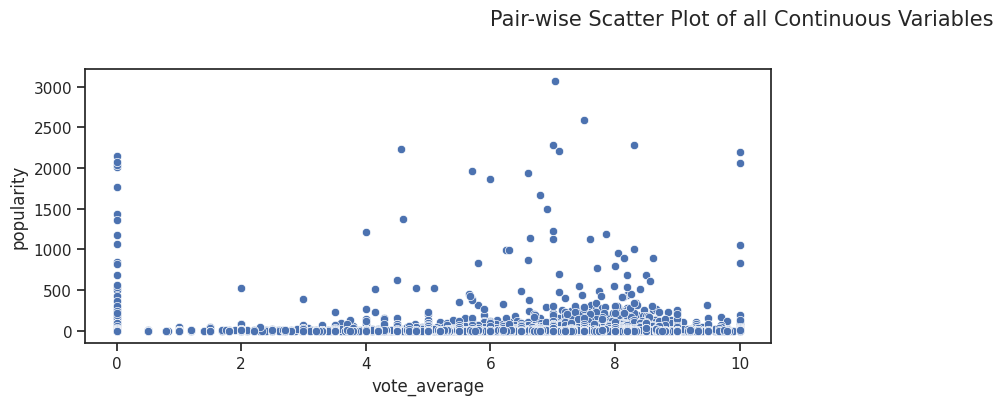

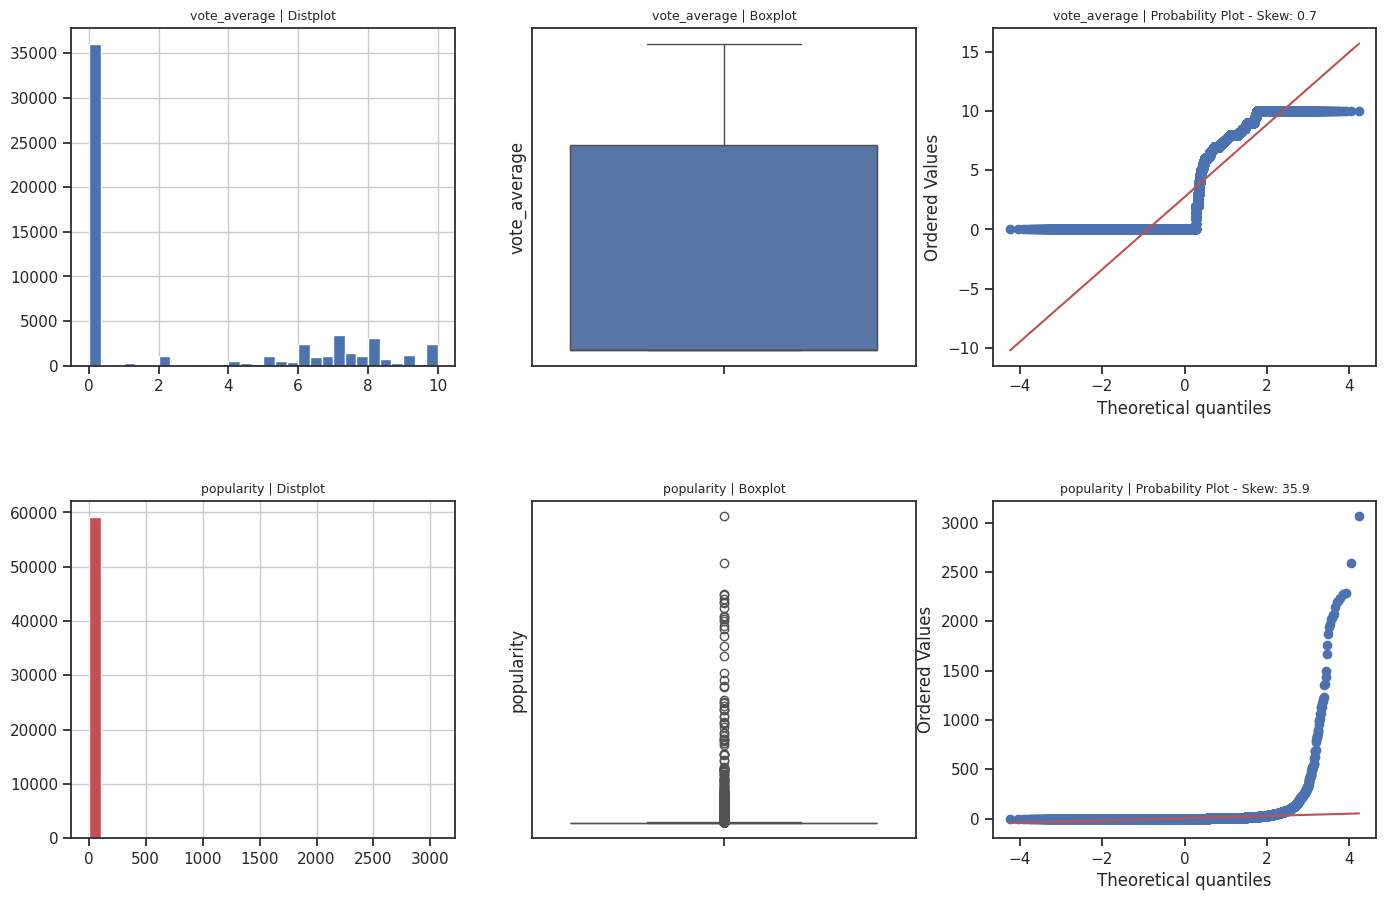

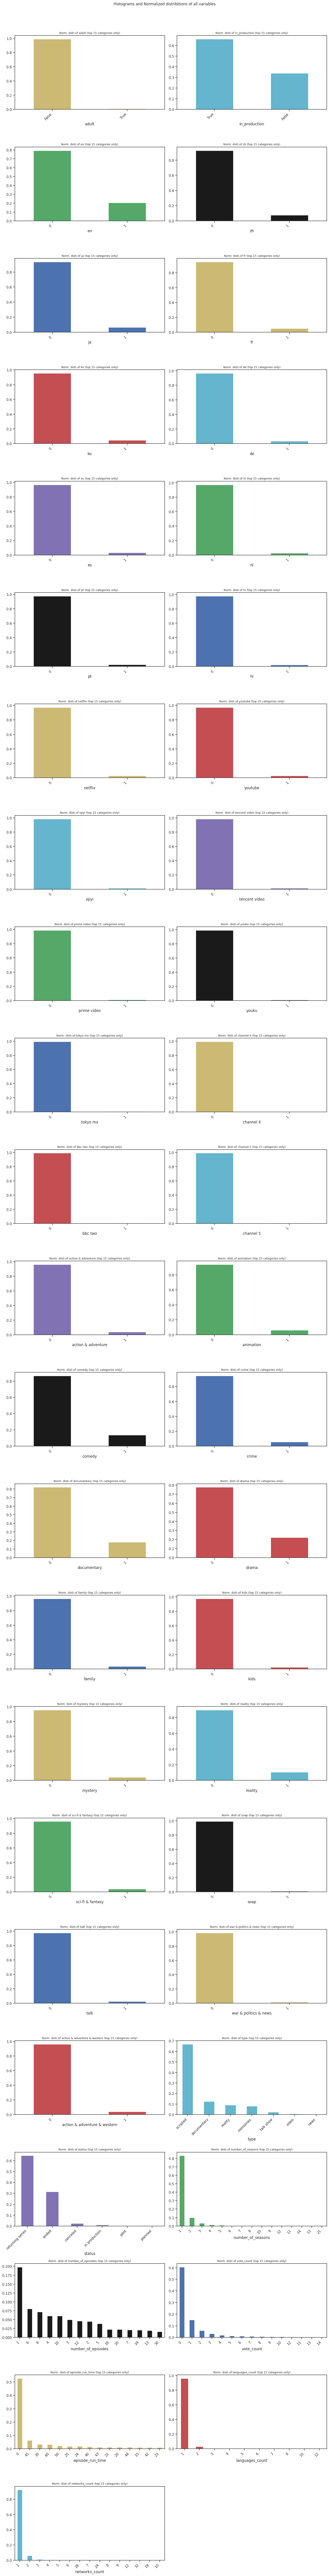

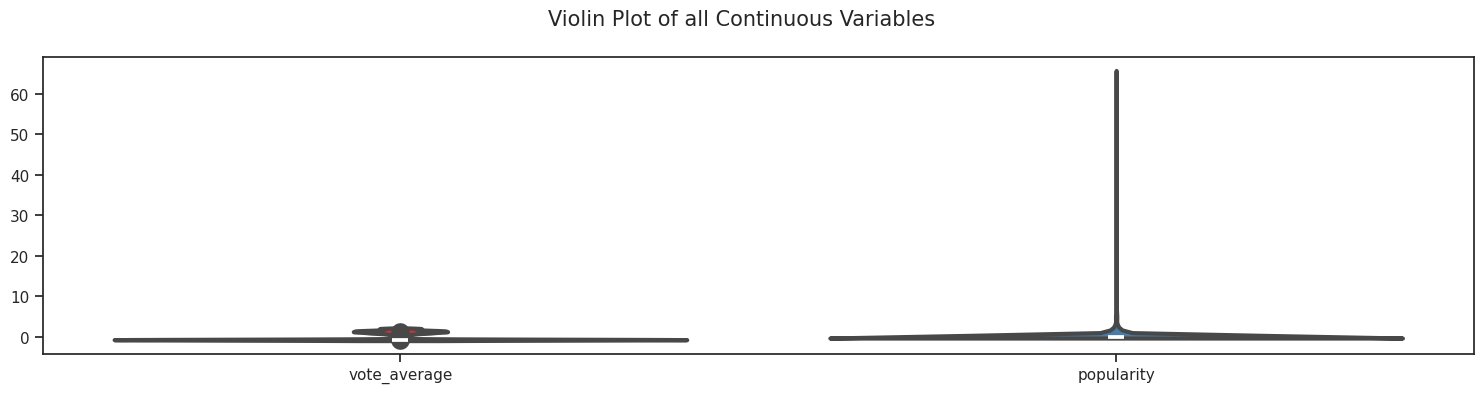

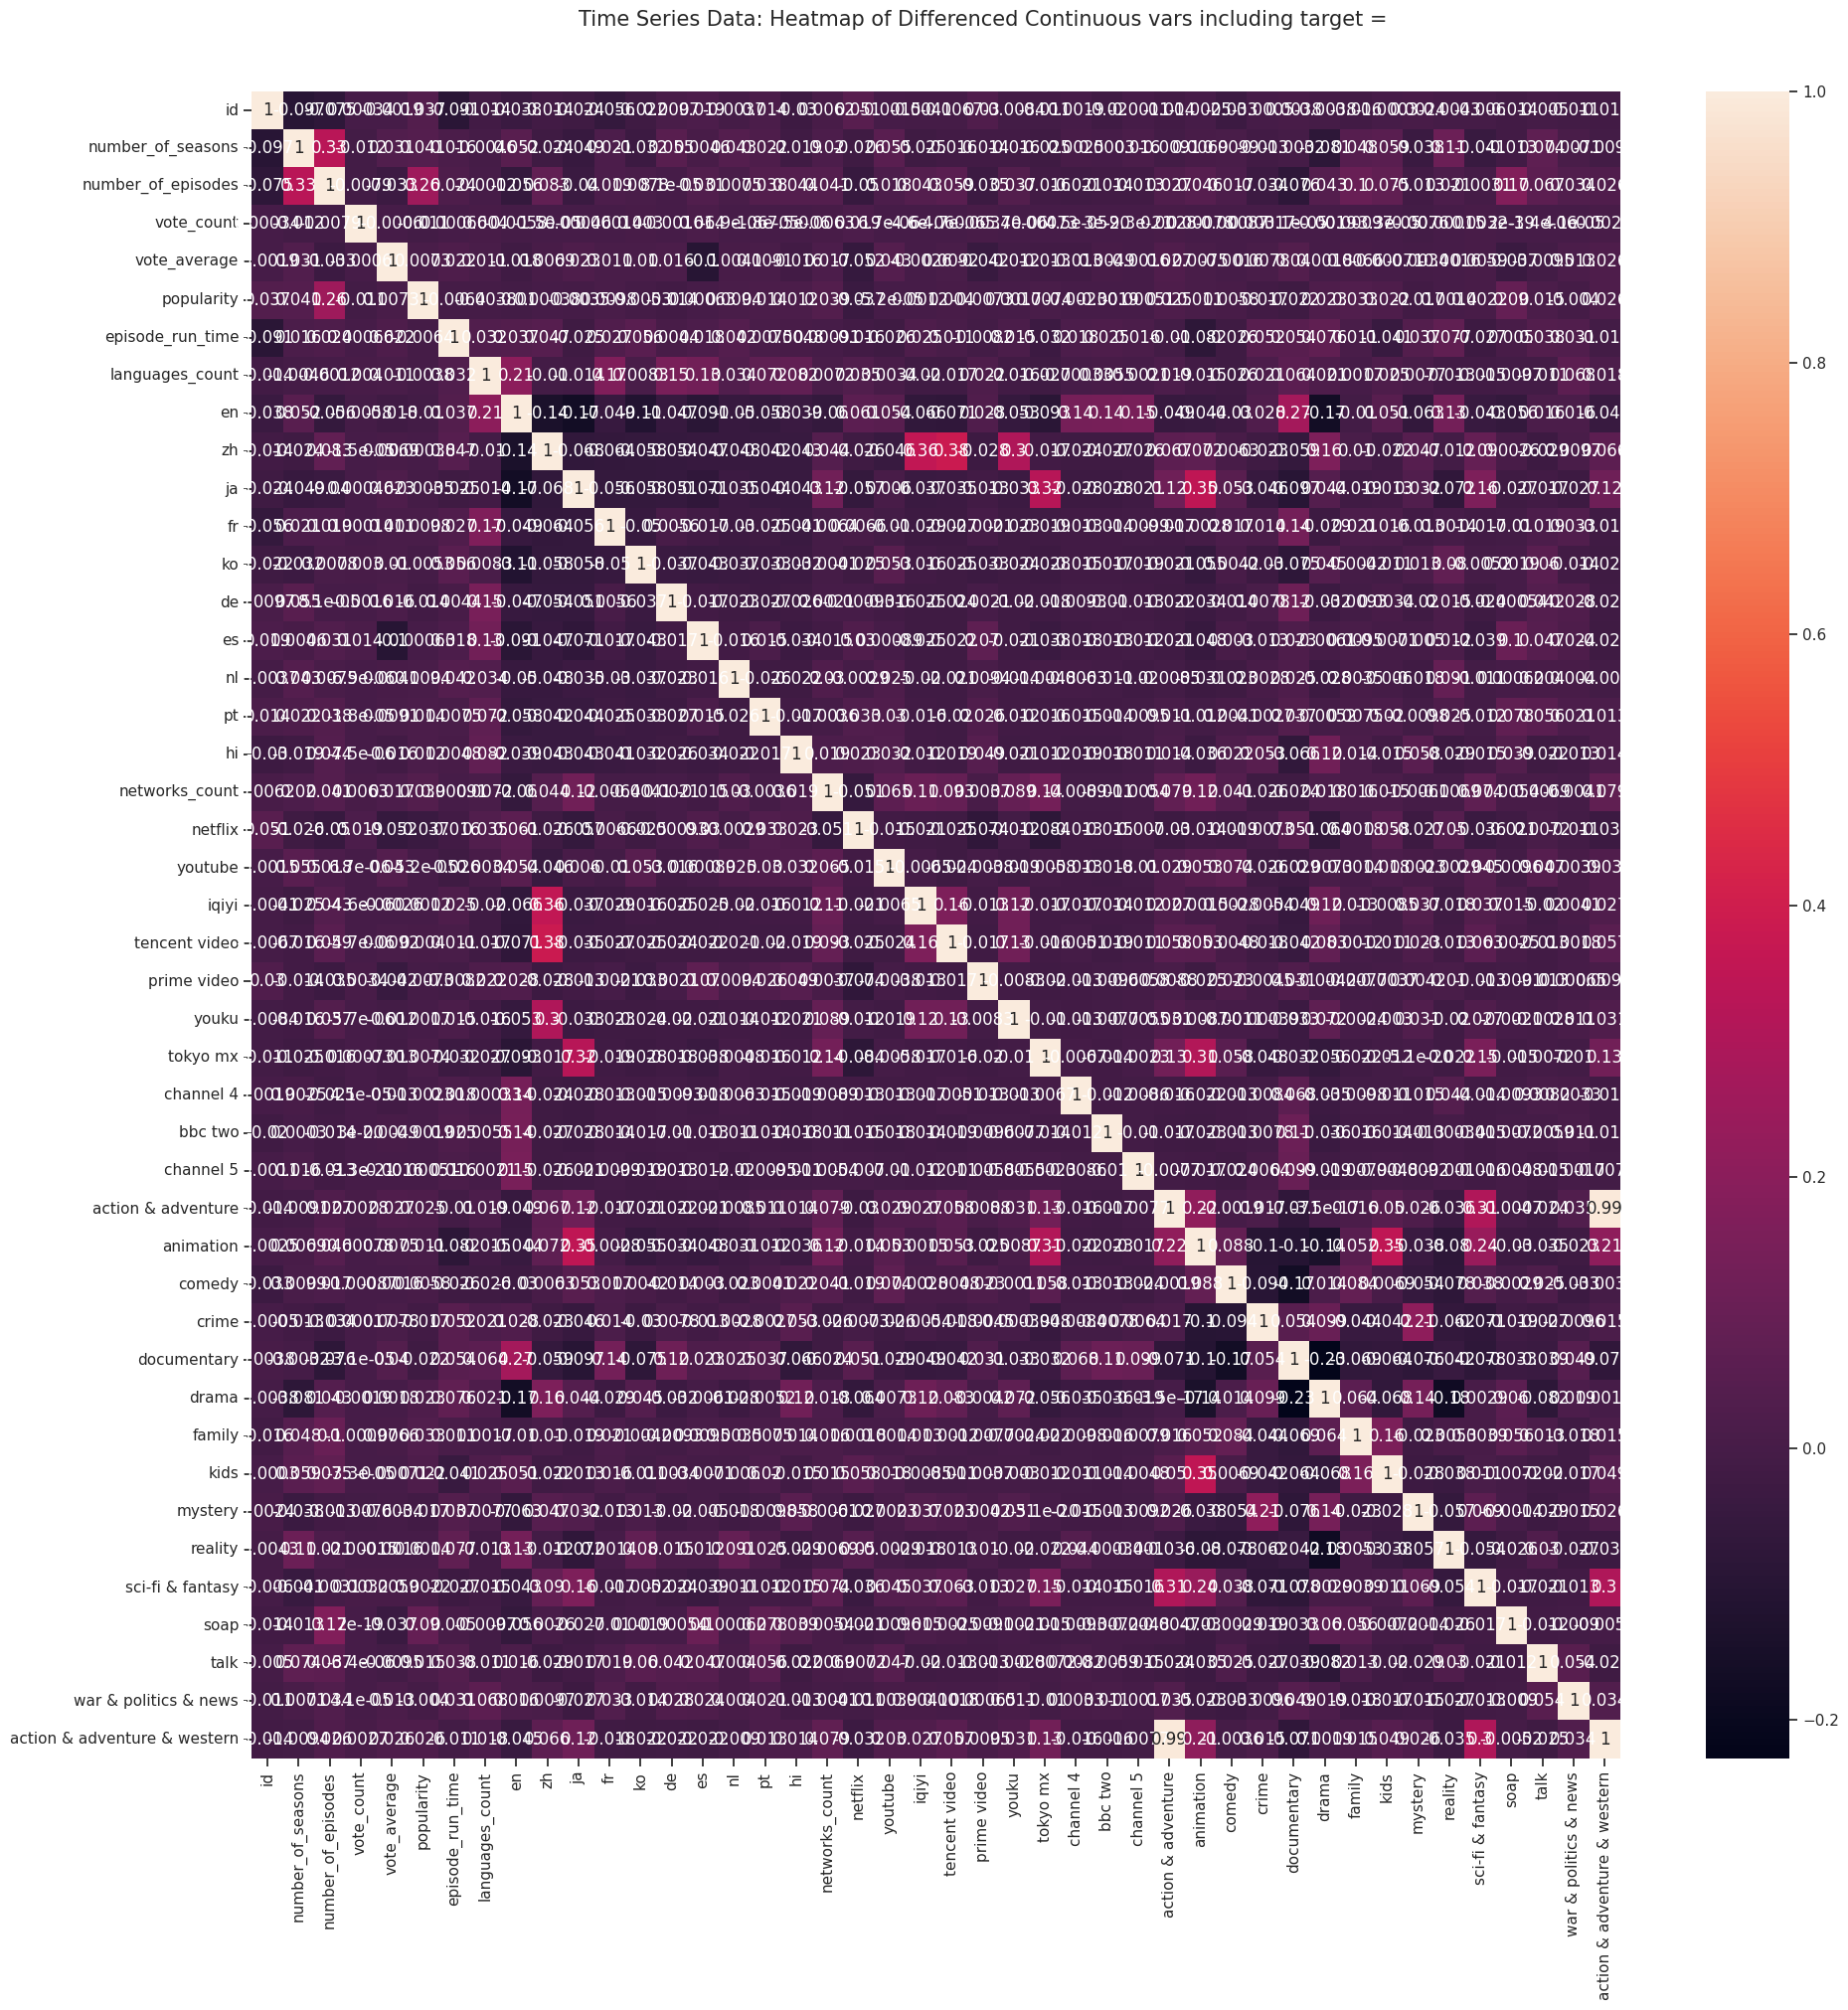

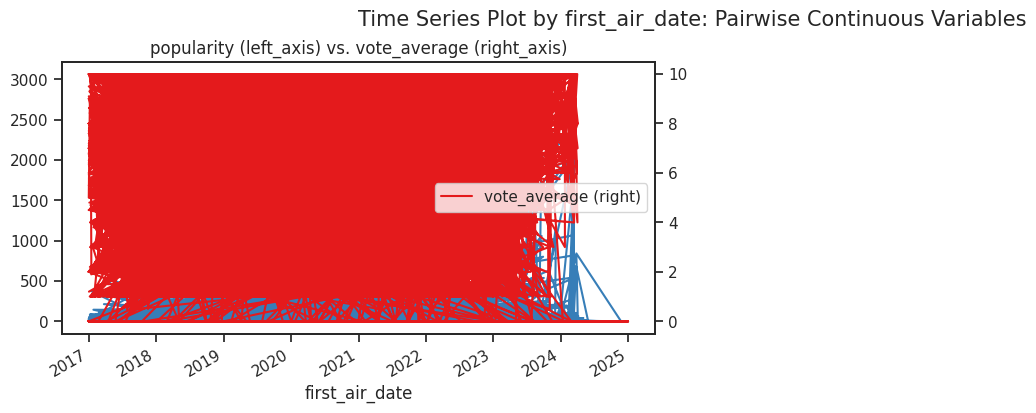

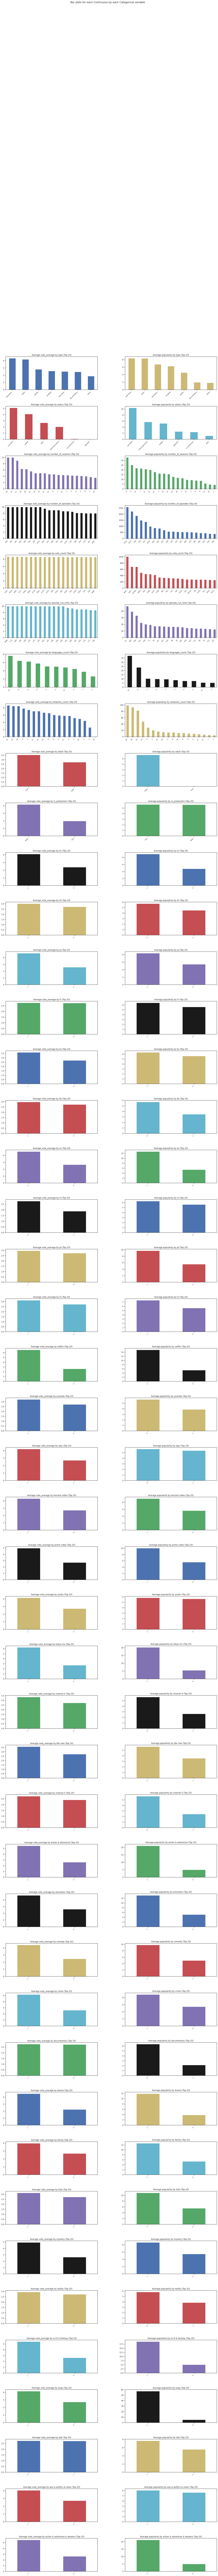

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for genres. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for networks. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nlt

id         name        number_of_seasons  number_of_episodes  \
1        71446      money heist          3                   41          
5        69050        riverdale          7                  137          
6        93405       squid game          2                    9          
8        71712  the good doctor          6                  116          
9        85271      wandavision          1                    9          
...        ...              ...                ...                 ...   
168624  240698   take my muffin          1                    8          
168630  240293           jhanak          1                   32          
168632  240609     born to be y          1                    1          
168633  240693    jokah & tutty          1                    8          
168636  240696          picasso          1                    1          

        vote_count  vote_average  adult first_air_date last_air_date  \
1          17836        8.257     False   2017-05-02     2021-12-03    
5          13180        8.479     False   2017-01-26     2023-08-23    
6          13053        7.831     False   2021-09-17     2021-09-17    
8          11768        8.503     False   2017-09-25     2023-05-01    
9          11308        8.300     False   2021-01-15     2021-03-05    
...            ...           ...    ...            ...           ...   
168624         0        0.000      True   2022-04-19     2023-09-22    
168630         0        0.000     False   2023-11-20     2023-12-21    
168632         0        0.000     False   2024-03-06            NaT    
168633         0        0.000     False   2023-11-30     2023-11-30    
168636         0        0.000     False   2023-11-30     2023-11-30    

        in_production  popularity     type          status       \
1           False         96.354     scripted             ended   
5           False        143.750     scripted             ended   
6            True        115.587     scripted  returning series   
8            True        681.614     scripted  returning series   
9           False         62.893   miniseries             ended   
...               ...         ...         ...               ...   
168624       True          0.000     scripted  returning series   
168630       True          3.710   miniseries  returning series   
168632       True          0.600     scripted  returning series   
168633       True          3.028     scripted  returning series   
168636       True          1.895     scripted  returning series   

                      genres                languages       networks       \
1                             crime, drama          es  netflix, antena 3   
5                    crime, drama, mystery          en             the cw   
6       action & adventure, mystery, drama  en, ko, ur            netflix   
8                                    drama          en                abc   
9         sci-fi & fantasy, mystery, drama          en            disney+   
...                                    ...         ...                ...   
168624                   animation, comedy                                  
168630                               drama          hi    disney+ hotstar   
168632                               drama          th             gmm 25   
168633   comedy, action & adventure, drama          de     amazon freevee   
168636                               crime          bn                      

       origin_country  \
1            es         
5            us         
6            kr         
8            us         
9            us         
...               ...   
168624       ru         
168630       in         
168632       th         
168633       de         
168636       in         

                                  production_companies                             \
1                                                                 vancouver media   
5       warner bros. television, berlanti productions, 

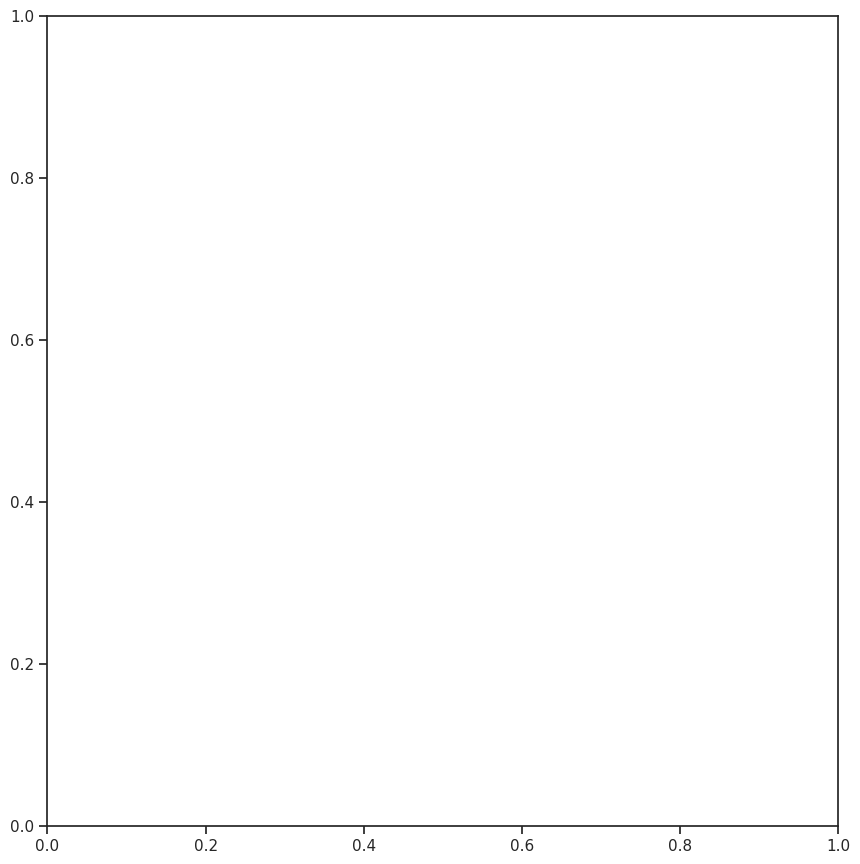

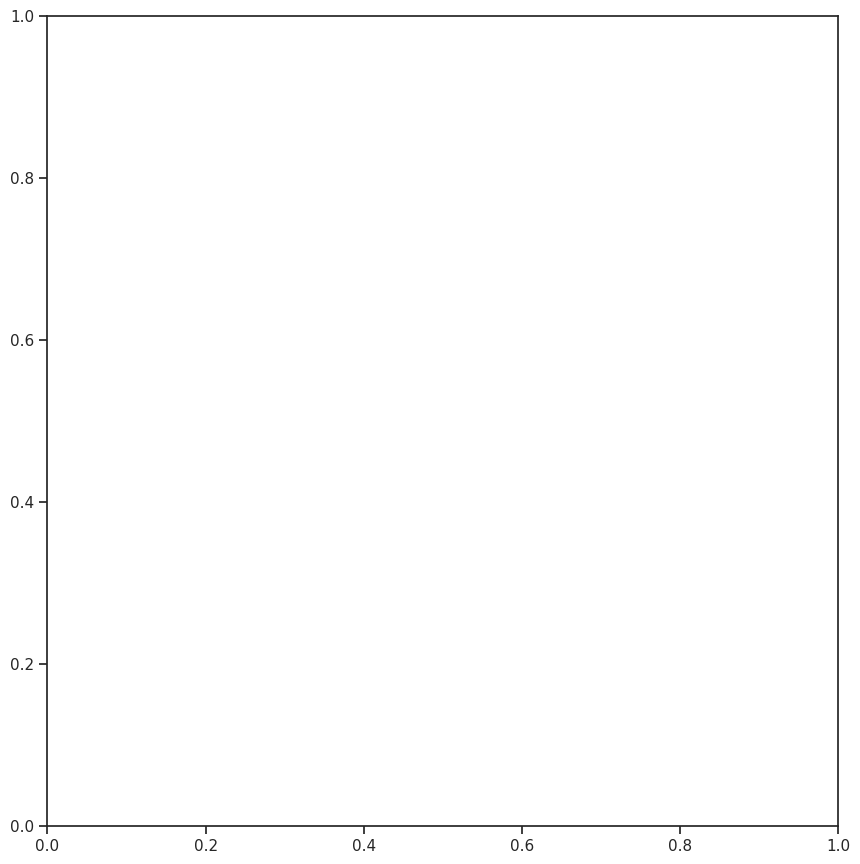

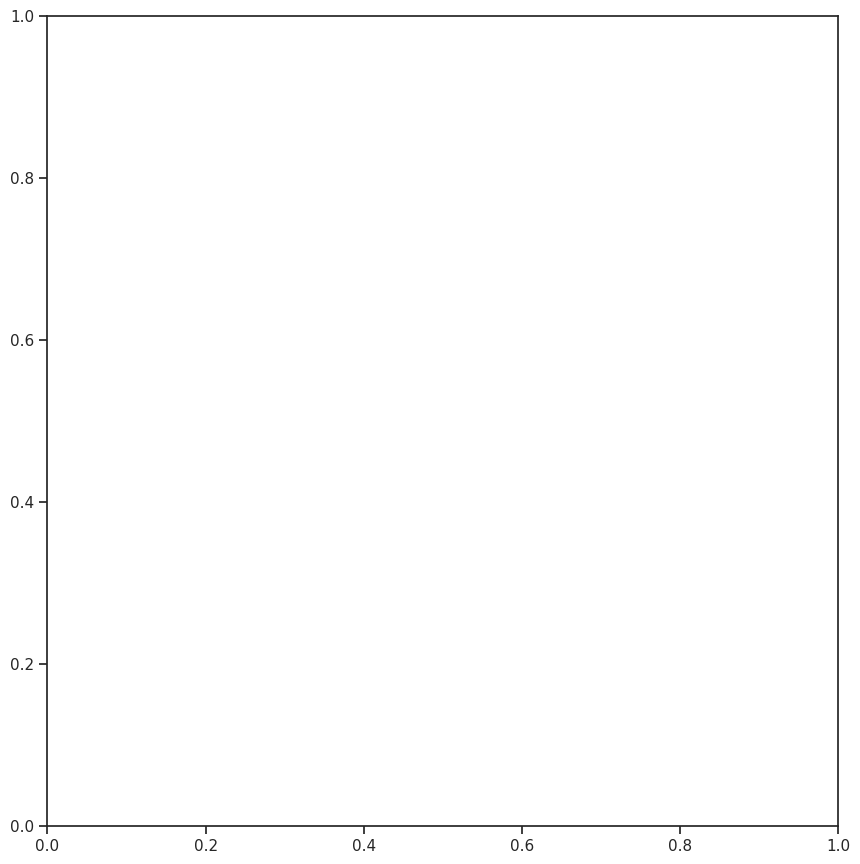

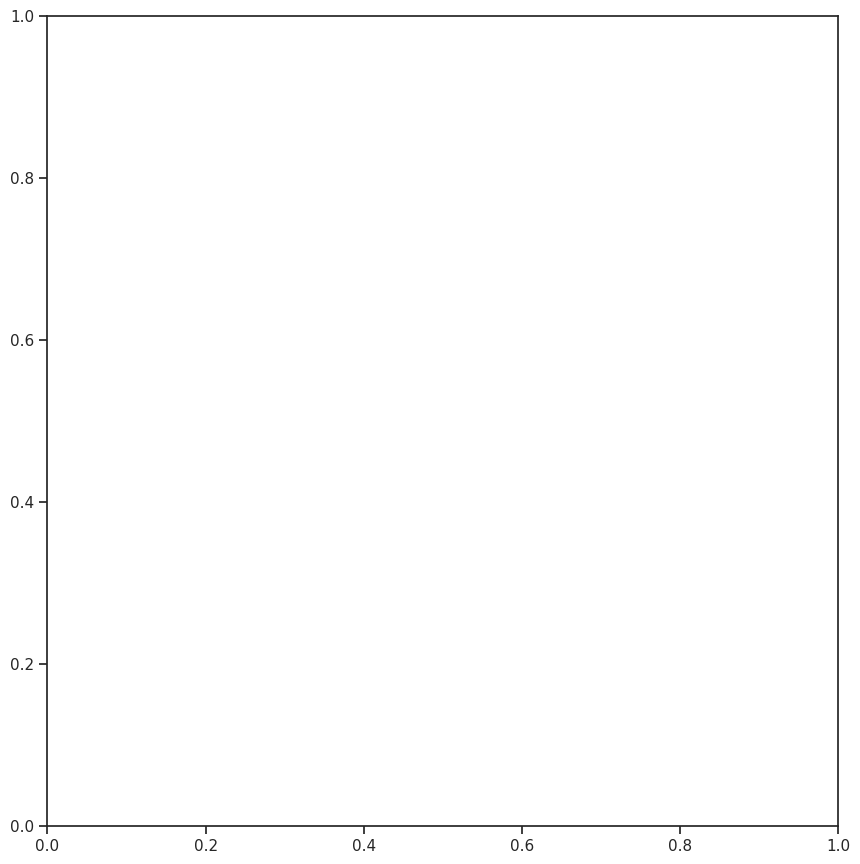

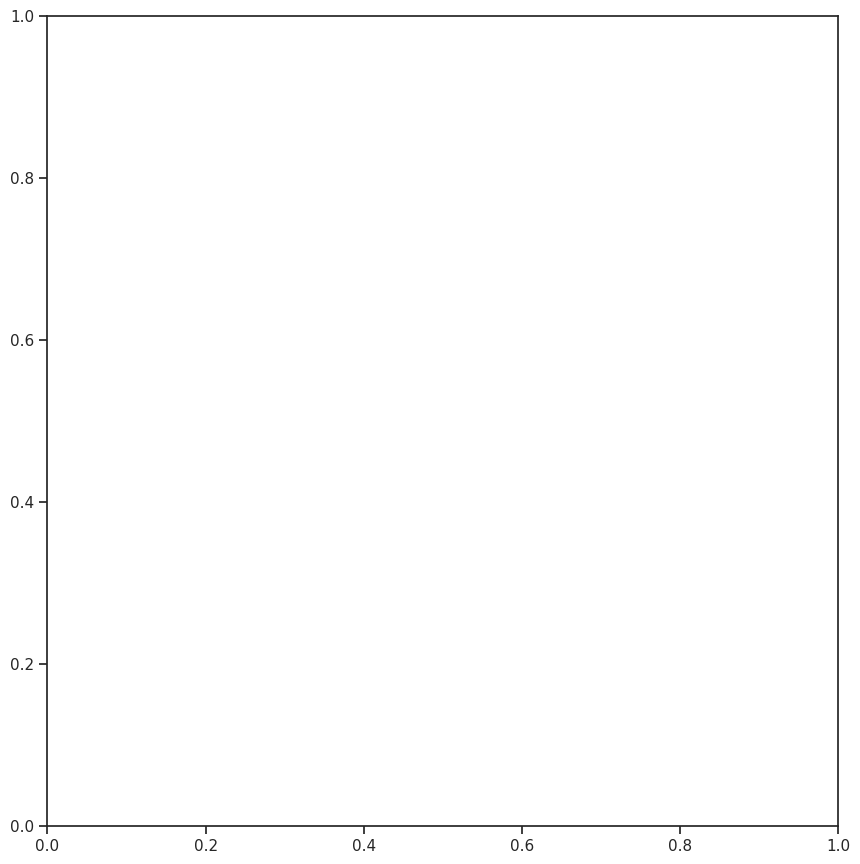

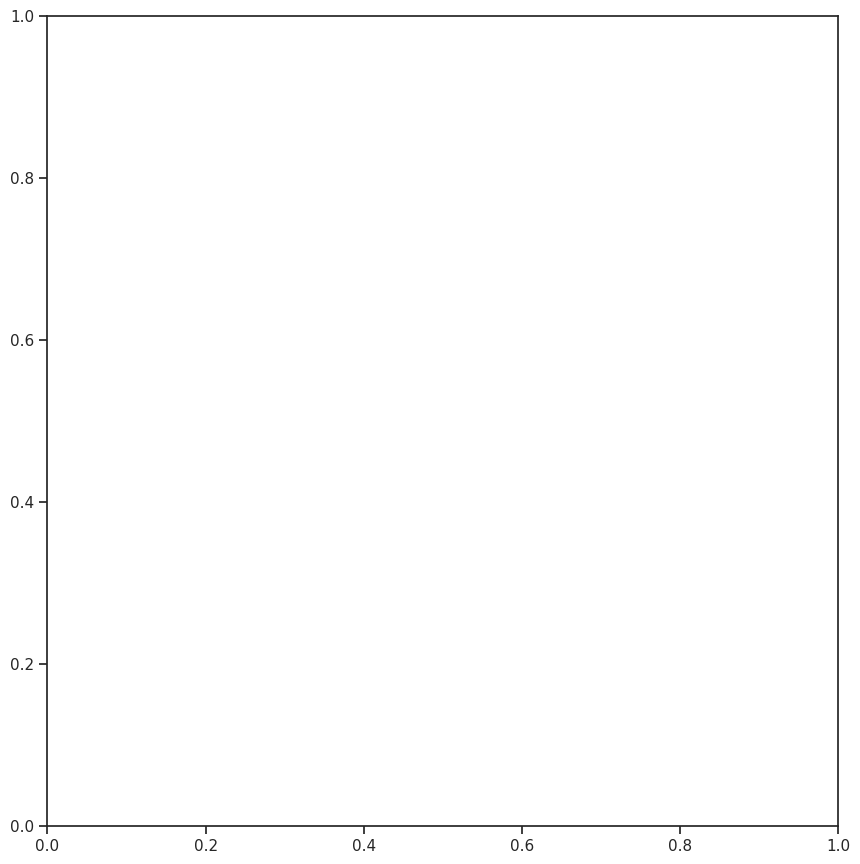

In [17]:

from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df)



#Continues Numbers

#Visualizing the Distribution of Continuous Variables

In [18]:

con_col = ['number_of_episodes', 'number_of_seasons', 'popularity', 'vote_count', 'vote_average', 'languages_count', 'networks_count']
con_col

['number_of_episodes',
 'number_of_seasons',
 'popularity',
 'vote_count',
 'vote_average',
 'languages_count',
 'networks_count']

#Exploring Target 'Popularity' Distribution: Histogram, Boxplot, and KDE"

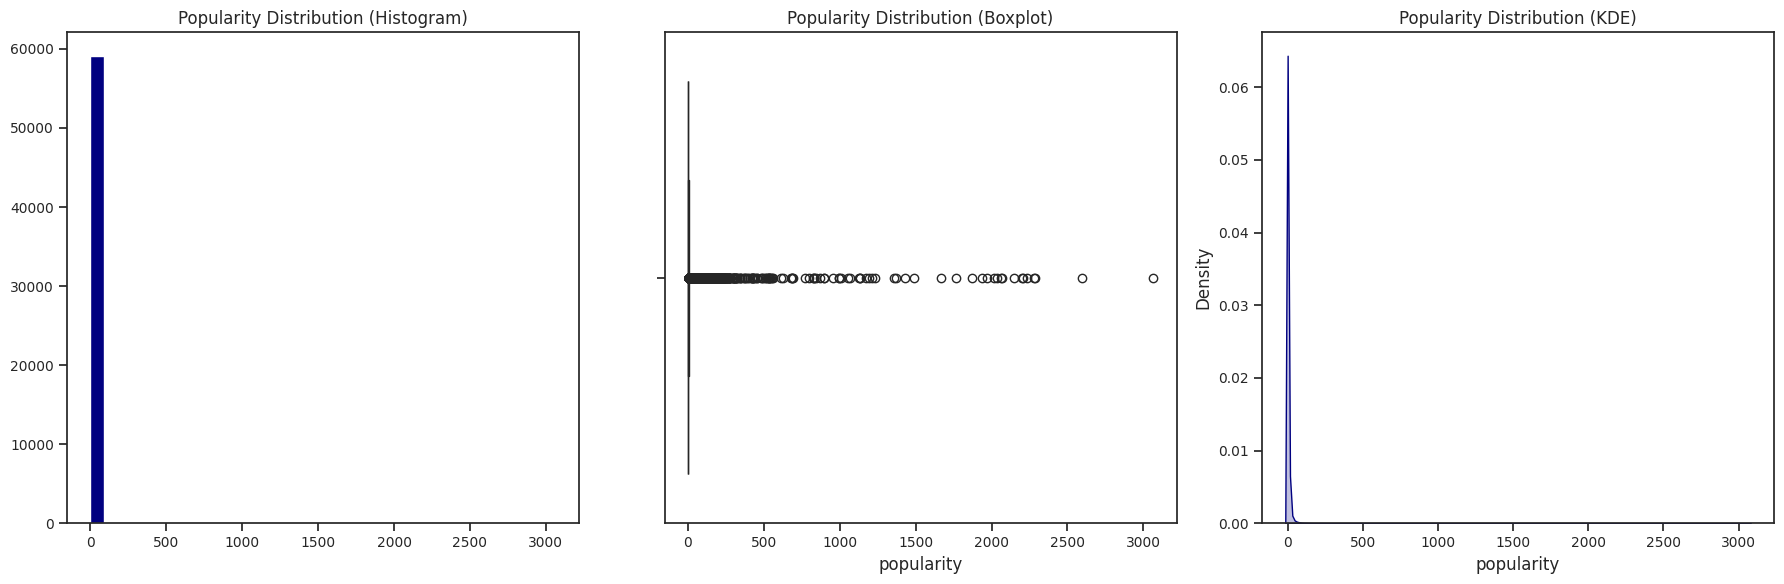

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed

# Plot 1: Histogram for 'popularity'
axes[0].hist(df['popularity'], bins=35, color="navy")
axes[0].set_title('Popularity Distribution (Histogram)', fontsize=12)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Plot 2: Boxplot for 'popularity'
sns.boxplot(x=df['popularity'], color="navy", ax=axes[1])
axes[1].set_title('Popularity Distribution (Boxplot)', fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Plot 3: KDE Plot for 'popularity'
sns.kdeplot(df['popularity'], shade=True, color="navy", ax=axes[2])
axes[2].set_title('Popularity Distribution (KDE)', fontsize=12)
axes[2].tick_params(axis='x', labelsize=10)
axes[2].tick_params(axis='y', labelsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


#Customized Histograms for Continuous Variables

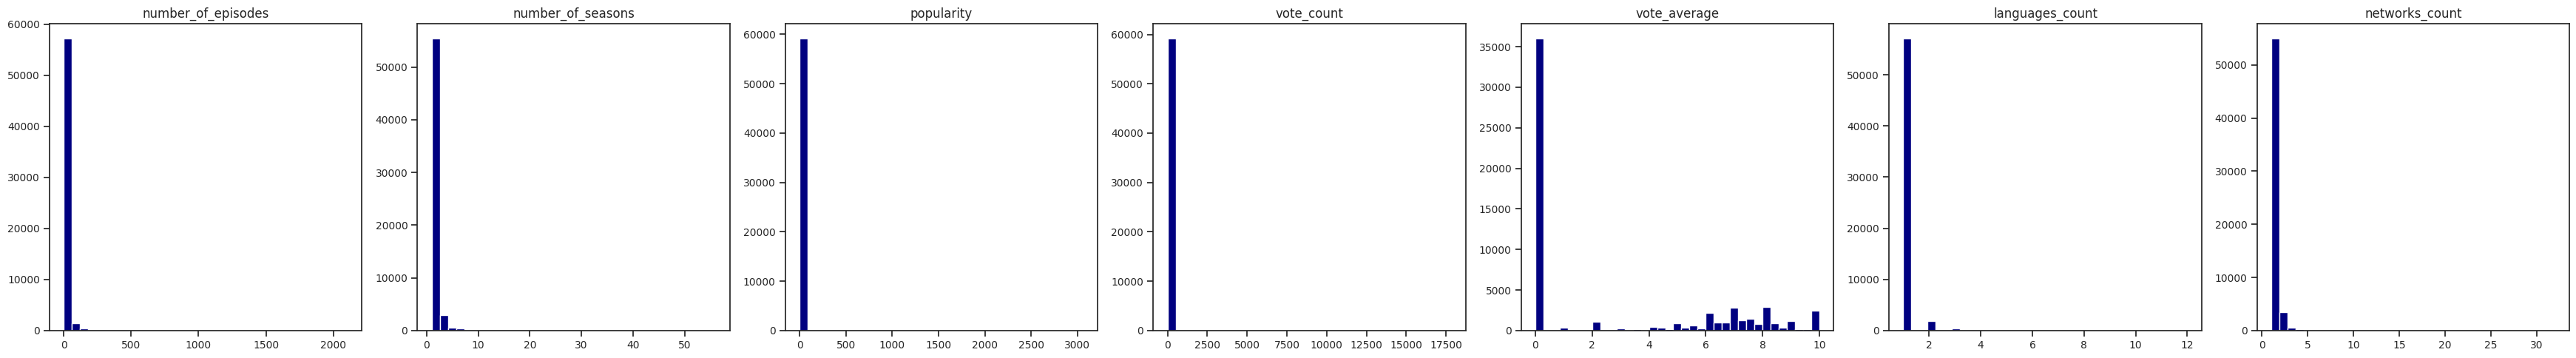

In [20]:
import matplotlib.pyplot as plt


# Customize histogram plotting
num_cols = len(con_col)
fig, axes = plt.subplots(1, num_cols, figsize=(5*num_cols, 5))  # Dynamically adjust figsize based on number of columns

# Loop through columns and plot histograms
for i, col in enumerate(con_col):
    axes[i].hist(df[col], bins=35, color="navy")  # Use df[col] to access the data for each column
    axes[i].set_title(col, fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()



#Scatter Plots for Continuous Variables vs Popularity

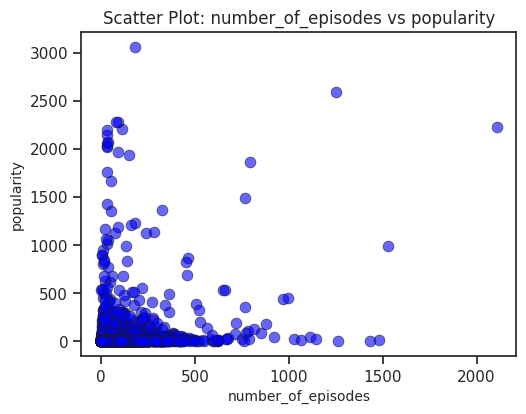

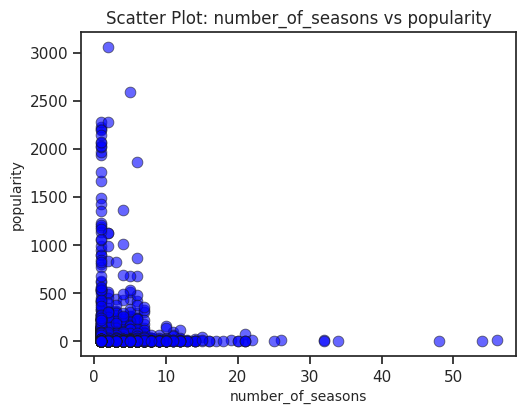

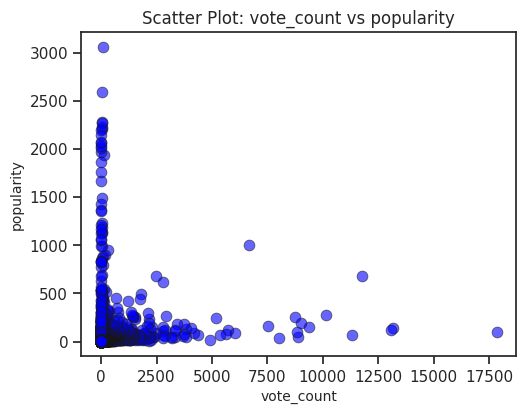

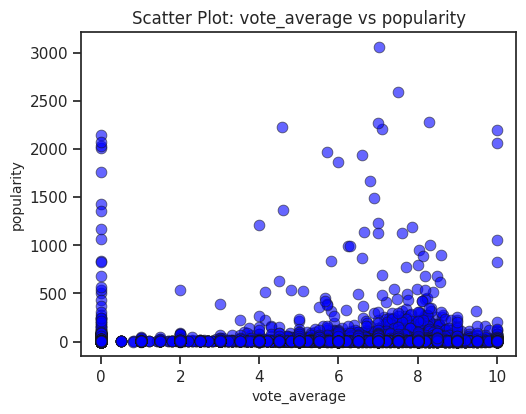

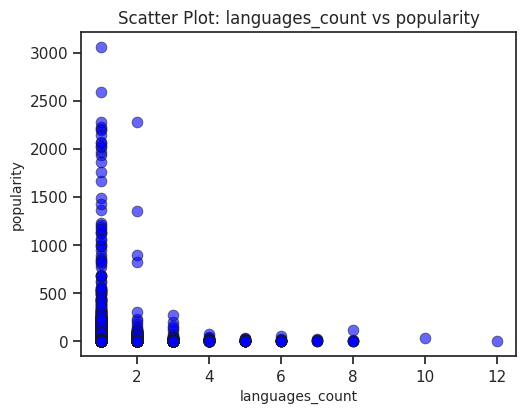

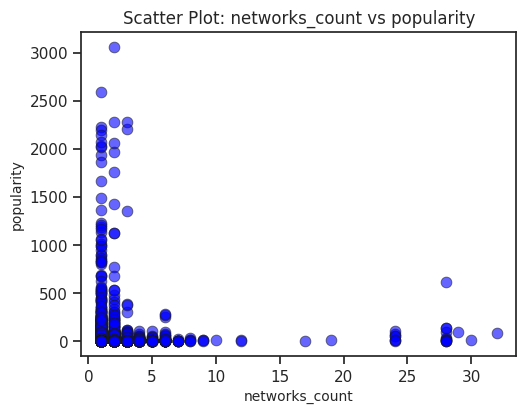

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your target variable
target = 'popularity'

# Create scatter plots for each of the columns in 'con_col' vs 'popularity', excluding 'popularity' itself
for col in con_col:
    if col != target:  # Skip the plot when the column is 'popularity'
        plt.figure(figsize=(5, 4))  # Set the figure size to smaller (width=5, height=4)
        sns.scatterplot(x=col, y=target, data=df, alpha=0.6, color='blue', edgecolor='k', s=60)

        # Set title and labels
        plt.title(f'Scatter Plot: {col} vs {target}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel(target, fontsize=10)

        # Show the plot
        plt.show()



The scatter plots reveal that the relationships between the continuous variables and popularity are non-linear and non-monotonic. Many variables exhibit skewed distributions, rather than a normal distribution. Outliers are present, which may impact the relationship with popularity. Some features show clusters, indicating varying patterns of popularity within certain ranges. Overall, there is no clear linear relationship between most of the variables and popularity.

#Skewness

In [22]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    else:
        return default  # Return default for cases in between



# Calculate the skewness for the specified columns
skewness = df[con_col].skew()

# Create a DataFrame from skewness values and apply the highlight function
skew_df = pd.DataFrame(skewness, columns=['skewness']).sort_values(by='skewness', ascending=False)

# Apply the highlight function
skew_df.style.applymap(highlight)


The skewness values indicate that the distributions of 'vote_count,' 'popularity,' 'number_of_episodes,' and 'number_of_seasons' are highly positively skewed, meaning they have a long right tail with most data points concentrated on the lower end - it means these distributions are not normal.

In contrast, 'vote_average' has a much lower skewness value, suggesting that its distribution is closer to a normal distribution with less asymmetry.

#Log Transformation
Improved Visualization: Log transformation helps to compress the scale of highly skewed data (e.g., vote_count, popularity), making it easier to visualize, especially when there are extreme values.

Aesthetic Presentation: It makes the data look more symmetric and cleaner, improving the clarity of plots for better presentation.

Not for Normalization: The log transformation is applied here mainly for visual enhancement, rather than to meet statistical assumptions for modeling.

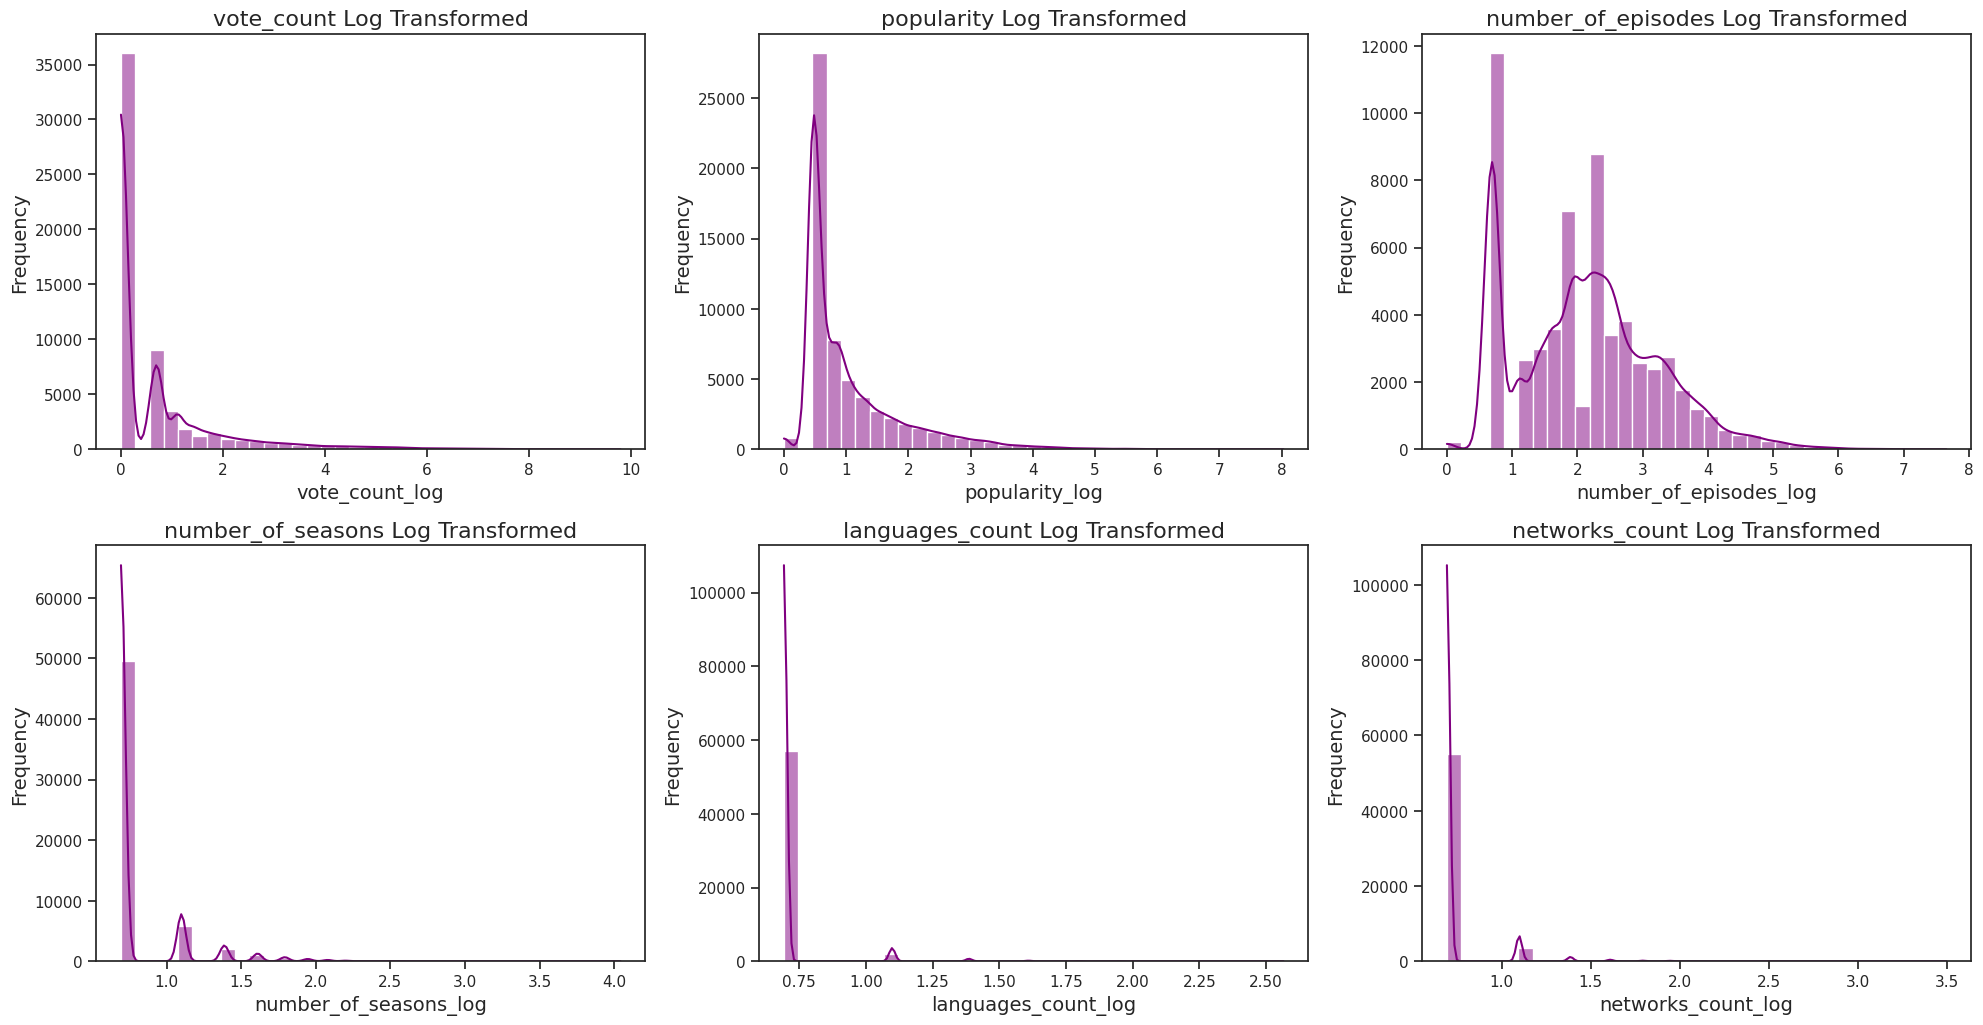

In [23]:


# Apply log transformation to highly skewed columns
skewed_cols = ['vote_count', 'popularity', 'number_of_episodes', 'number_of_seasons','languages_count','networks_count']
for col in skewed_cols:
    df[f'{col}_log'] = np.log1p(df[col])  # log1p is log(x + 1) to avoid log(0)

# Visualize the transformed data
plt.figure(figsize=(20, 15))

for i, col in enumerate(skewed_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[f'{col}_log'], kde=True, color="purple", bins=35)
    plt.title(f'{col} Log Transformed', fontsize=16)
    plt.xlabel(f'{col}_log', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

#Correlation Heatmap of Continuous Variables

Creating a correlation heatmap to examine the relationships between your continuous features and to identify any multicollinearity.

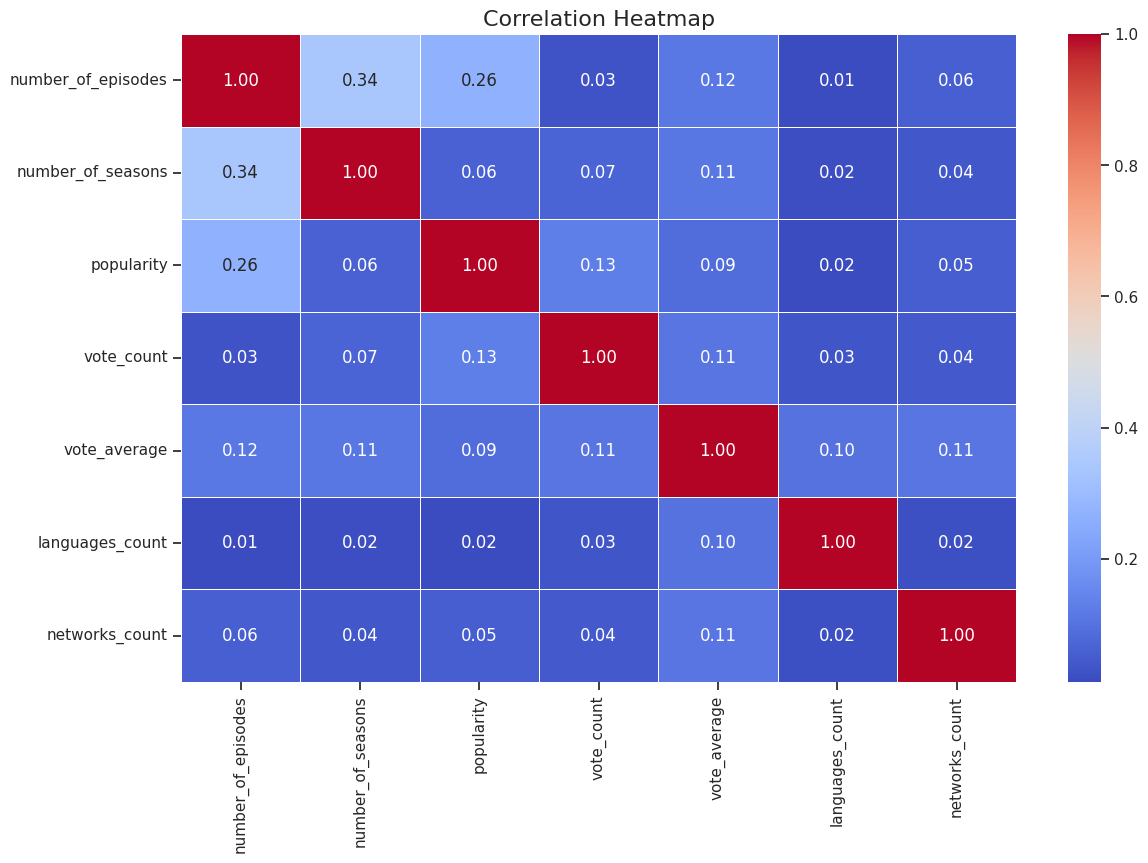

In [24]:
correlation_matrix = df[con_col].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [25]:


print(correlation_matrix)

# To display the correlation matrix as a DataFrame (easy to copy from Jupyter)
correlation_matrix


                    number_of_episodes  number_of_seasons  popularity  \
number_of_episodes       1.000000           0.340682        0.263820    
number_of_seasons        0.340682           1.000000        0.061288    
popularity               0.263820           0.061288        1.000000    
vote_count               0.028743           0.069263        0.129088    
vote_average             0.116068           0.112722        0.087061    
languages_count          0.012421           0.019024        0.015948    
networks_count           0.056844           0.036817        0.053750    

                    vote_count  vote_average  languages_count  networks_count  
number_of_episodes   0.028743     0.116068       0.012421         0.056844     
number_of_seasons    0.069263     0.112722       0.019024         0.036817     
popularity           0.129088     0.087061       0.015948         0.053750     
vote_count           1.000000     0.105263       0.033508         0.044583     
vote_average   

number_of_episodes  number_of_seasons  popularity  \
number_of_episodes       1.000000           0.340682        0.263820    
number_of_seasons        0.340682           1.000000        0.061288    
popularity               0.263820           0.061288        1.000000    
vote_count               0.028743           0.069263        0.129088    
vote_average             0.116068           0.112722        0.087061    
languages_count          0.012421           0.019024        0.015948    
networks_count           0.056844           0.036817        0.053750    

                    vote_count  vote_average  languages_count  networks_count  
number_of_episodes   0.028743     0.116068       0.012421         0.056844     
number_of_seasons    0.069263     0.112722       0.019024         0.036817     
popularity           0.129088     0.087061       0.015948         0.053750     
vote_count           1.000000     0.105263       0.033508         0.044583     
vote_average         0.105263     1.000000       0.099107         0.108371     
languages_count      0.033508     0.099107       1.000000         0.021037     
networks_count       0.044583     0.108371       0.021037         1.000000

#Interpretation of the Correlation Coefficient:
 0.2 to 0.4	Weak positive correlation ('popularity' and number_of episodes')=0.34

 0 to 0.2	Very weak or no positive correlation ('popularity' and 'vote_count')= 0.12

In [26]:

# Perform Spearman's rank correlation
spearman_corr, spearman_p_value = stats.spearmanr(df['popularity'], df['number_of_episodes'])

# Display the results
print(f"Spearman's correlation between {'popularity'} and {'number_of_episodes'}: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")

# Interpret the result
if spearman_p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Spearman's correlation between popularity and number_of_episodes: 0.488
P-value: 0.000
The correlation is statistically significant.


In [27]:
import scipy.stats as stats

# Perform Spearman's rank correlation
spearman_corr, spearman_p_value = stats.spearmanr(df['popularity'], df['vote_count'])

# Display the results
print(f"Spearman's correlation between popularity and vote_count: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")

# Interpret the result
if spearman_p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Spearman's correlation between popularity and vote_count: 0.572
P-value: 0.000
The correlation is statistically significant.


#Visualizing the Relationship between Popularity and Key Features: Number of Episodes & Vote Count with Regression Lines

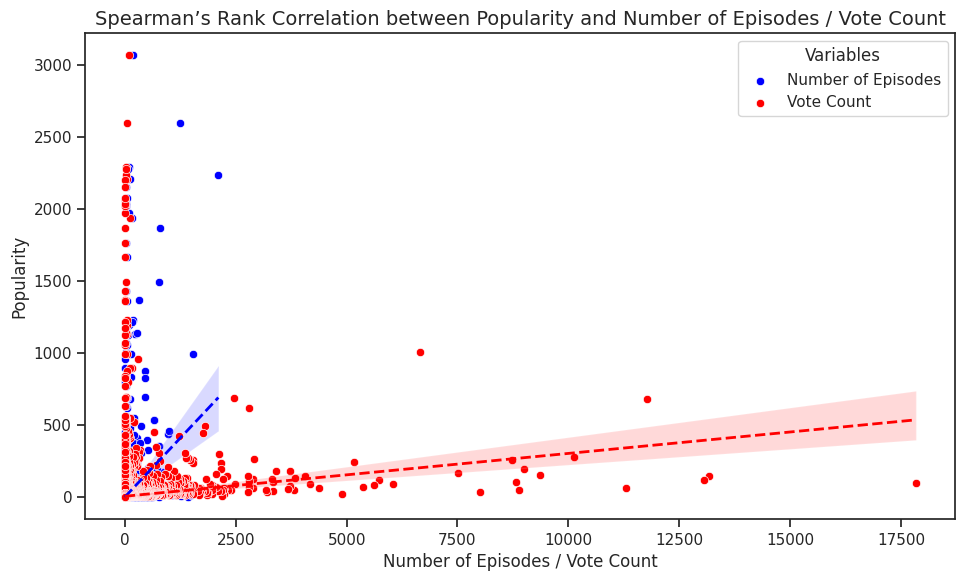

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))

# Plot for 'number_of_episodes' vs 'popularity' with scatter
sns.scatterplot(data=df, x='number_of_episodes', y='popularity', color='blue', label='Number of Episodes')

# Add regression line for 'number_of_episodes' vs 'popularity'
sns.regplot(data=df, x='number_of_episodes', y='popularity', scatter=False, color='blue', line_kws={'color': 'blue', 'linewidth': 2, 'linestyle': '--'})

# Plot for 'vote_count' vs 'popularity' with scatter
sns.scatterplot(data=df, x='vote_count', y='popularity', color='red', label='Vote Count')

# Add regression line for 'vote_count' vs 'popularity'
sns.regplot(data=df, x='vote_count', y='popularity', scatter=False, color='red', line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})

# Title and labels
plt.title('Spearman’s Rank Correlation between Popularity and Number of Episodes / Vote Count', fontsize=14)
plt.xlabel('Number of Episodes / Vote Count', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Adding a legend to distinguish between the two
plt.legend(title='Variables')

plt.show()


The above plot visualizes the relationship between popularity and both number_of_episodes (blue) and vote_count (red) using scatter plots.
Additionally, regression lines are added to show the trend of these relationships, with dashed lines representing the best-fit lines for each variable.

#Analyzing Categorical Columns

In [29]:

# Define the columns  to category
cat_cols = ['genres','languages','networks','origin_country', 'type', 'status']

# Convert the selected columns to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

# Filter out the categorical columns
categorical_df = df[cat_cols]  # Directly selecting the categorical columns







#Visualizing the Top 10 Most Frequent Categories for Each Categorical Feature

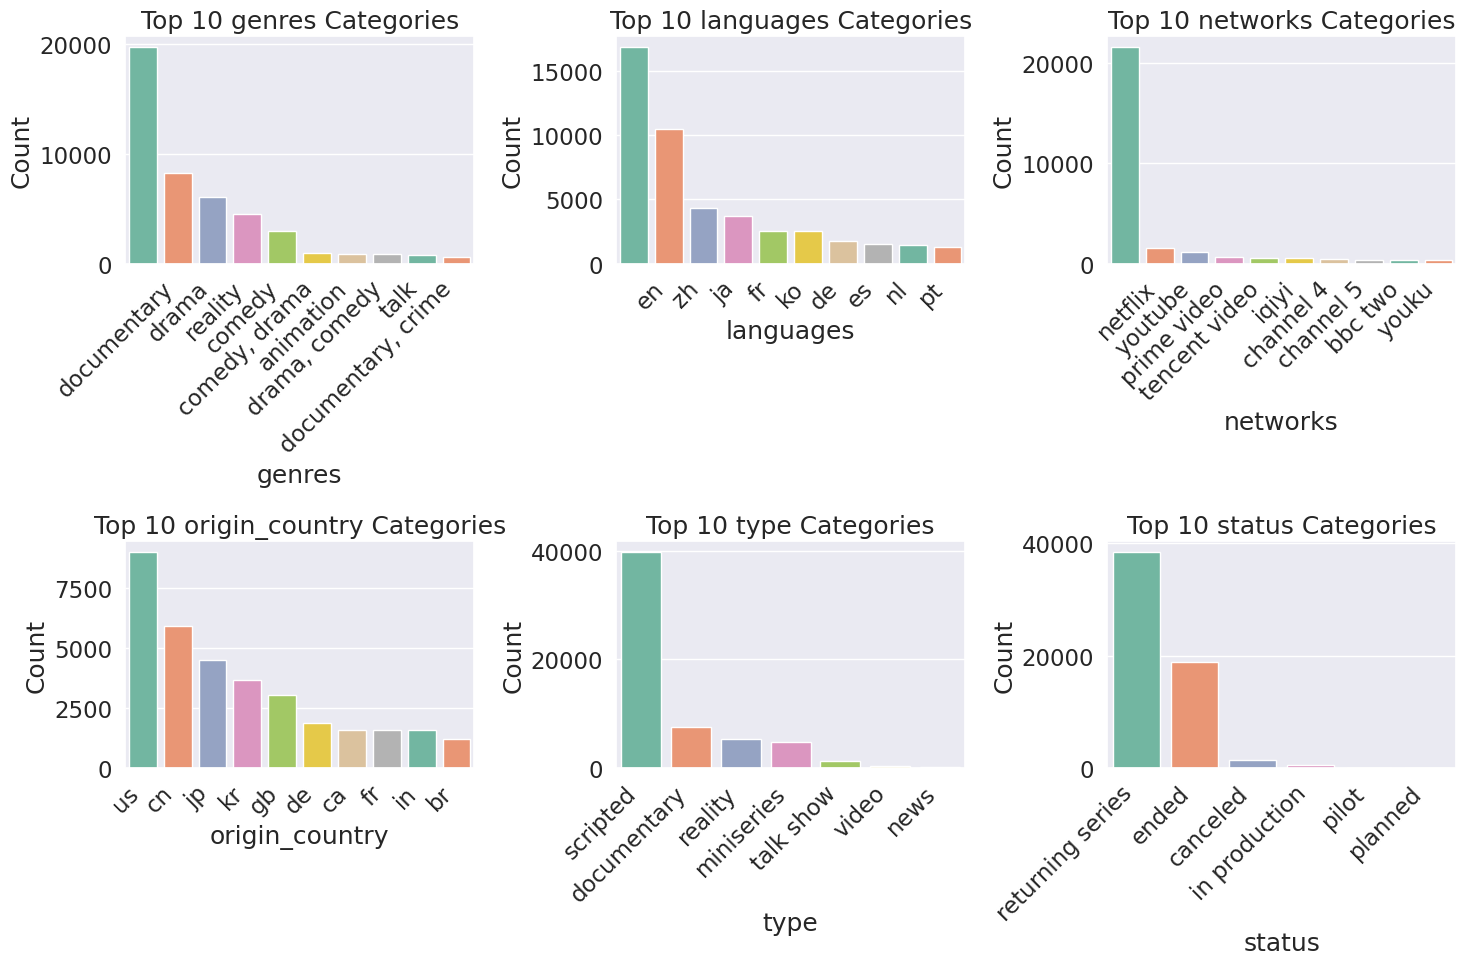

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the selected columns to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

# Filter out the categorical columns
categorical_df = df[cat_cols]

# Function to plot top 10 categories for each column with different colors
def plot_top_10_categories(col):
    top_10 = categorical_df[col].value_counts().nlargest(10)  # Get top 10 most frequent categories
    # Use a different color palette for each category
    sns.countplot(x=col, data=categorical_df, order=top_10.index, palette='Set2')  # Change the palette if needed
    plt.title(f'Top 10 {col} Categories')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Create a figure for the subplots
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
sns.set(font_scale=1.5)

# Loop over the categorical columns and create subplots
for i, col in enumerate(categorical_df.columns, start=1):
    plt.subplot(2, 3, i)  # Adjust the subplot layout to your number of columns (2 rows, 3 columns here)
    plot_top_10_categories(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#Analysis of Popularity Across Top 10 Categories for Each Categorical Feature

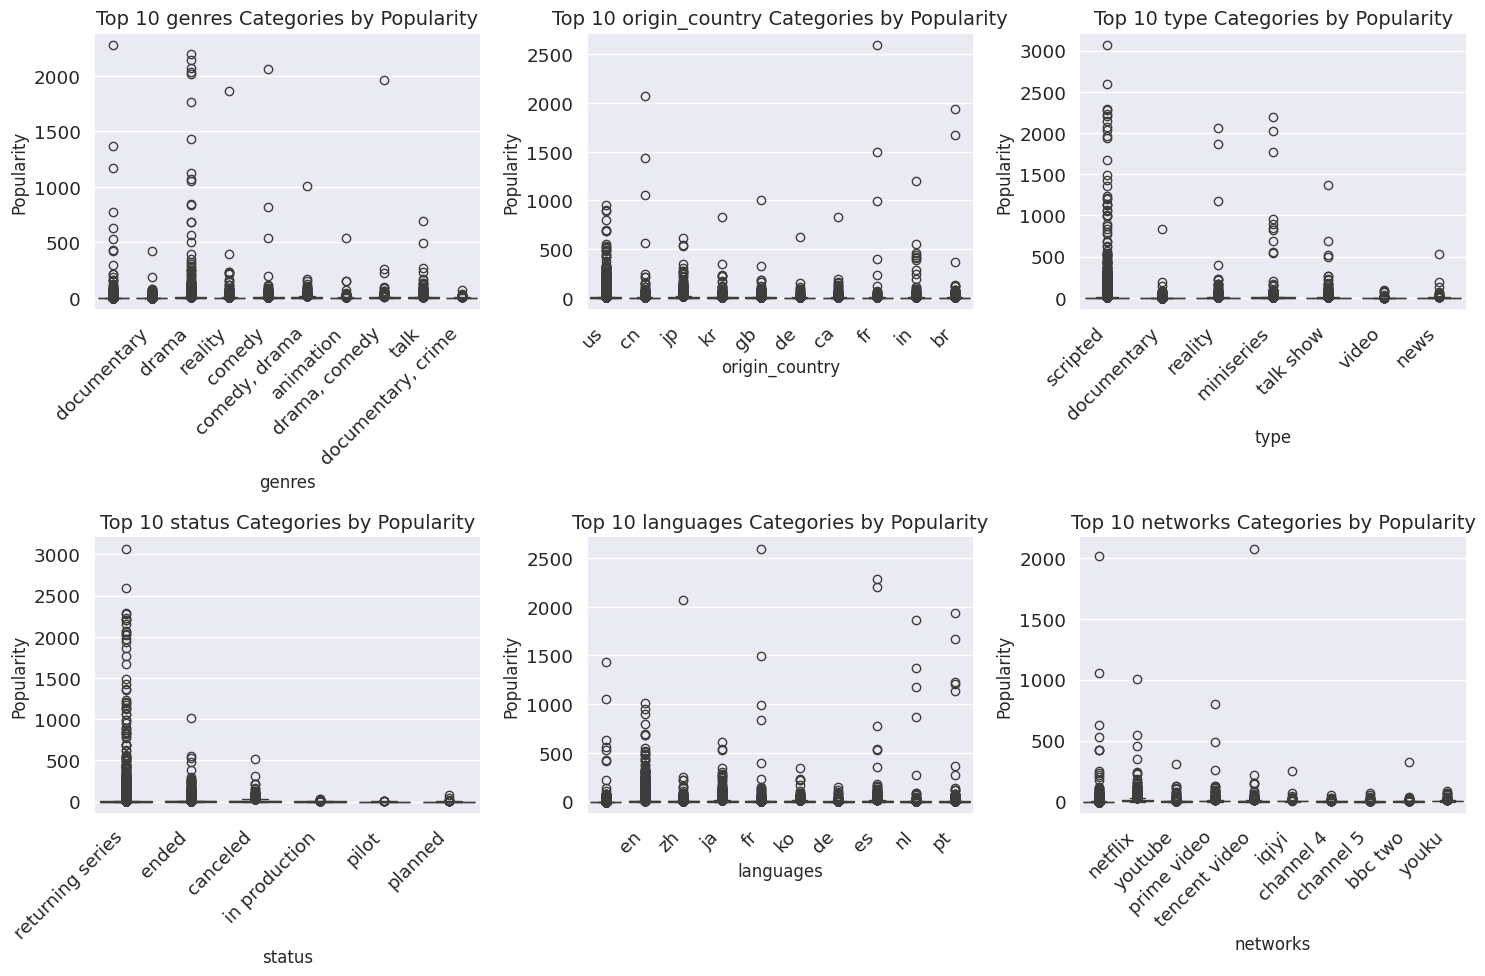


Kruskal-Wallis Test for genres:
Statistic: 10750.694287593904, p-value: 0.0
Result: Significant difference in popularity across genres categories.

Kruskal-Wallis Test for origin_country:
Statistic: 635.788622434893, p-value: 4.339033477874542e-131
Result: Significant difference in popularity across origin_country categories.

Kruskal-Wallis Test for type:
Statistic: 1786.4496158588881, p-value: 0.0
Result: Significant difference in popularity across type categories.

Kruskal-Wallis Test for status:
Statistic: 4060.26823744374, p-value: 0.0
Result: Significant difference in popularity across status categories.

Kruskal-Wallis Test for languages:
Statistic: 11379.177699426247, p-value: 0.0
Result: Significant difference in popularity across languages categories.

Kruskal-Wallis Test for networks:
Statistic: 7218.581591374078, p-value: 0.0
Result: Significant difference in popularity across networks categories.


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Define the columns you want to convert to category
cat_cols = ['genres', 'origin_country', 'type', 'status','languages','networks']

# Convert the selected columns to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

# Filter out the categorical columns
categorical_df = df[cat_cols]

# Function to plot the top 10 categories and compare with popularity using boxplot
def plot_top_10_categories_with_popularity(col):
    top_10 = categorical_df[col].value_counts().nlargest(10)  # Get top 10 most frequent categories
    # Set a palette explicitly to ensure different colors for each category
    sns.boxplot(x=col, y='popularity', data=df[df[col].isin(top_10.index)],
                order=top_10.index, palette='tab10')  # 'tab10' palette has distinct colors
    plt.title(f'Top 10 {col} Categories by Popularity', fontsize=14)  # Reduce the title font size
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Popularity', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Create a figure for the subplots
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
sns.set(font_scale=1.2)  # Control the overall font size for better clarity

# Loop over the categorical columns and create subplots
for i, col in enumerate(categorical_df.columns, start=1):
    plt.subplot(2, 3, i)  # Adjust the subplot layout to your number of columns (2 rows, 3 columns here)
    plot_top_10_categories_with_popularity(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Now, let's perform Kruskal-Wallis test for each category column (on top 10 categories) to see if popularity differs by category
for col in cat_cols:
    top_10 = categorical_df[col].value_counts().nlargest(10)  # Top 10 most frequent categories
    categories = top_10.index
    # Perform Kruskal-Wallis test to see if popularity differs significantly across categories
    kruskal_result = stats.kruskal(
        *[df[df[col] == category]['popularity'] for category in categories]
    )
    print(f'\nKruskal-Wallis Test for {col}:')
    print(f'Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}')

    if kruskal_result.pvalue < 0.05:
        print(f"Result: Significant difference in popularity across {col} categories.")
    else:
        print(f"Result: No significant difference in popularity across {col} categories.")

The Kruskal-Wallis test reveals significant differences in popularity across various categorical variables: genres, languages, networks, origin_country, type, and status, as all tests show p-values close to 0, indicating a strong statistical significance. Specifically, the results suggest that popularity varies significantly across each of these categories.

#Highest Median Popularity

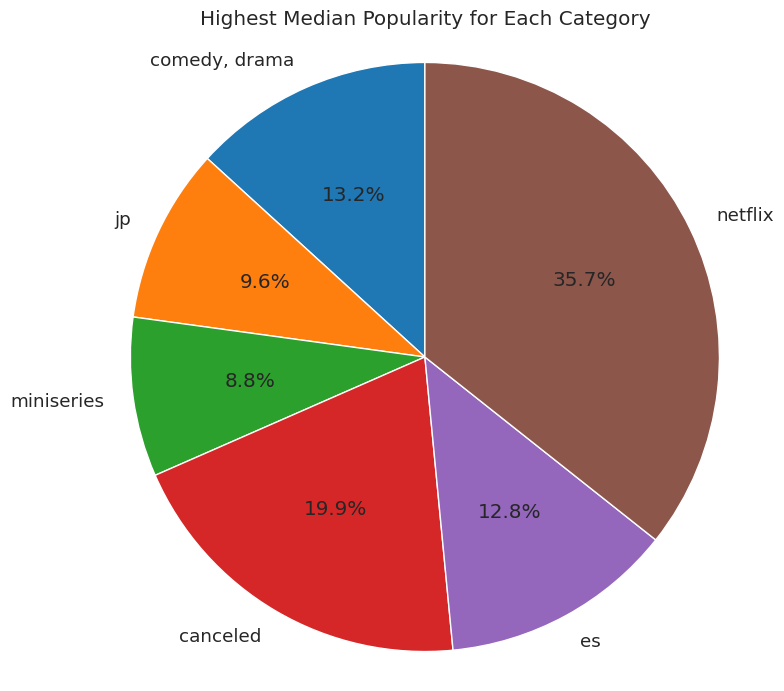

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Define the columns you want to convert to category
cat_cols = ['genres', 'origin_country', 'type', 'status', 'languages', 'networks']

# Convert the selected columns to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

# Initialize a dictionary to store the highest popularity for each category
highest_popularity_dict = {}

# Find the highest median popularity for each category
for col in cat_cols:
    top_10 = categorical_df[col].value_counts().nlargest(10)  # Get the top 10 most frequent categories
    categories = top_10.index

    # Find the subcategory with the highest median popularity for each of the top 10 categories
    category_popularity = df[df[col].isin(categories)].groupby(col)['popularity'].median()

    # Identify the subcategory with the highest median popularity
    highest_popularity_category = category_popularity.idxmax()
    highest_popularity_value = category_popularity.max()

    # Store the results in the dictionary
    highest_popularity_dict[col] = {
        'subcategory': highest_popularity_category,
        'popularity': highest_popularity_value
    }

# Now we will create a pie chart based on this data
categories = list(highest_popularity_dict.keys())  # Column names (e.g., genres, origin_country, etc.)
popularity_values = [highest_popularity_dict[col]['popularity'] for col in categories]
subcategory_labels = [highest_popularity_dict[col]['subcategory'] for col in categories]

# Plotting the Pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(popularity_values, labels=subcategory_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10", len(categories)))
ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Add title
plt.title('Highest Median Popularity for Each Category')

plt.show()


Genres: The highest median popularity is "comedy, drama" with a score of 2.7285.
Origin Country: The highest median popularity is "jp" (Japan) with a score of 1.98.
Type: The highest median popularity is "miniseries" with a score of 1.805.
Status: The highest median popularity is "canceled" with a score of 4.1135.
Languages: The highest median popularity is "es" (Spanish) with a score of 2.6425.
Networks: The highest median popularity is "netflix" with a score of 7.356.

# Drop columns that were used for better visualization (log) and dummy variables

In [33]:
# Drop specified columns from the DataFrame
df = df.drop(columns=['genres', 'languages', 'networks', 'popularity_log', 'vote_count_log',
                      'number_of_episodes_log', 'number_of_seasons_log', 'languages_count_log',
                      'networks_count_log'])

#Data Cleansing

#OUTLIERS


Box Plot

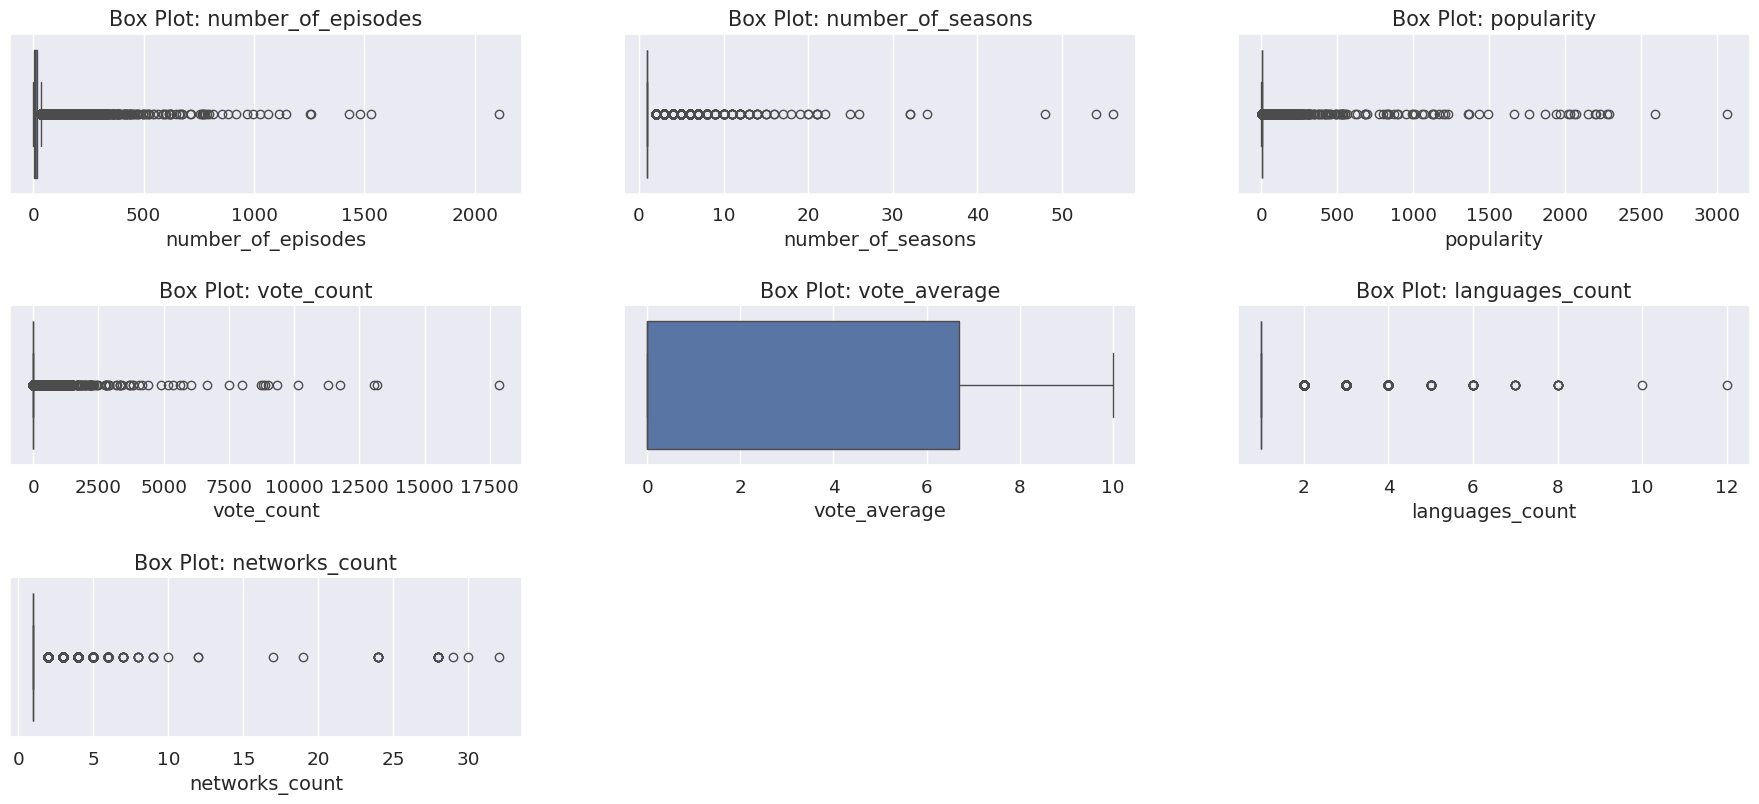

In [34]:


# Assuming 'df' is your DataFrame, and 'con_col' is the list of numeric columns you want to plot
def outliers_boxplot(df, con_col):
    plt.figure(figsize=(20, 200))

    for i, col in enumerate(con_col):
        if col != 'income':  # Check if you want to exclude 'income' column
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)  # Pass df and column name directly to sns.boxplot
            plt.subplots_adjust(hspace=0.7)
            plt.title(f'Box Plot: {col}', fontsize=15)
            plt.xlabel(col, fontsize=14)

# Call the function with your DataFrame and list of columns
outliers_boxplot(df, con_col)


#OUTLIERS DF

IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [35]:
import pandas as pd

def outliers_df(df, con_col):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in con_col:  # Ensure processing numeric columns only
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]  # Only return columns with outliers

# Assuming df is your DataFrame and con_col is the list of numeric columns
outliers_summary = outliers_df(df, con_col).sort_values('Percent', ascending=False)
print(outliers_summary)


                    Outlier count   Percent 
vote_count             10948.0     18.398763
number_of_seasons       9963.0     16.743412
popularity              8146.0     13.689836
number_of_episodes      5701.0      9.580869
networks_count          4513.0      7.584364
languages_count         2398.0      4.029981


Labeling every outlier with 'Outlier'

In [36]:


def outliers(df, outliers_df_summary):
    label_out_df = df.copy()
    for col in label_out_df:
        if col in outliers_df_summary.index:  # Check if the column has outliers
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3 - Q1)
            lower_limit = Q3 - 1.5 * (Q3 - Q1)
            # Label values as 'Outlier' if they are outside the IQR bounds
            label_out_df[col] = np.where(label_out_df[col] > upper_limit, 'Outlier',
                                          np.where(label_out_df[col] < lower_limit, 'Outlier', label_out_df[col]))
    return label_out_df

# Call the function with outliers_df_summary (make sure to pass the correct summary variable)
new_df_outliers = outliers(df, outliers_summary)
new_df_outliers.head(10)  # Display the first 10 rows with labeled outliers



id            name         number_of_seasons number_of_episodes  \
1   71446           money heist       Outlier           Outlier        
5   69050             riverdale       Outlier           Outlier        
6   93405            squid game       Outlier                 9        
8   71712       the good doctor       Outlier           Outlier        
9   85271           wandavision             1                 9        
12  84958                  loki       Outlier                12        
14  82856       the mandalorian       Outlier           Outlier        
16  85552              euphoria       Outlier                16        
17  75006  the umbrella academy       Outlier           Outlier        
19  76669                 elite       Outlier           Outlier        

   vote_count  vote_average  adult first_air_date last_air_date  \
1    Outlier       8.257     False   2017-05-02     2021-12-03    
5    Outlier       8.479     False   2017-01-26     2023-08-23    
6    Outlier       7.831     False   2021-09-17     2021-09-17    
8    Outlier       8.503     False   2017-09-25     2023-05-01    
9    Outlier       8.300     False   2021-01-15     2021-03-05    
12   Outlier       8.200     False   2021-06-09     2021-07-14    
14   Outlier       8.500     False   2019-11-12     2023-04-19    
16   Outlier       8.353     False   2019-06-16     2022-02-27    
17   Outlier       8.604     False   2019-02-15     2022-06-22    
19   Outlier       8.071     False   2018-10-05     2022-11-18    

    in_production popularity     type          status      origin_country  \
1       False       Outlier     scripted             ended       es         
5       False       Outlier     scripted             ended       us         
6        True       Outlier     scripted  returning series       kr         
8        True       Outlier     scripted  returning series       us         
9       False       Outlier   miniseries             ended       us         
12       True       Outlier     scripted  returning series       us         
14       True       Outlier     scripted  returning series       us         
16       True       Outlier     scripted  returning series       us         
17       True       Outlier     scripted  returning series       us         
19       True       Outlier     scripted  returning series       es         

                                                      production_companies                                                    \
1                                                                                                            vancouver media   
5                                                  warner bros. television, berlanti productions, cbs studios, archie comics   
6                                                                                            siren pictures, firstman studio   
8                                                                         abc studios, 3ad, sony pictures television studios   
9                                                                                                             marvel studios   
12                                                                                                            marvel studios   
14                                                                   lucasfilm ltd., golem creations, fairview entertainment   
16  a24, the reasonable bunch, little lamb productions, dreamcrew, tiny goat, hbo, add content agency, hot, tedy productions   
17                                                                                             dark horse entertainment, ucp   
19                                                                                                              zeta studios   

    episode_run_time languages_count  en  zh  ja  fr  ko  de  es  nl  pt  hi  \
1          70                   1      0   0   0   0   0   0   1   0   0   0   
5          45                   1      1   0   0   0   0 

Crearting df_outliers with dummies

In [37]:
df_outliers = new_df_outliers.isin(['Outlier'])
df_outliers = df_outliers.astype('int')
df_outliers

id  name  number_of_seasons  number_of_episodes  vote_count  \
1        0    0           1                   1               1       
5        0    0           1                   1               1       
6        0    0           1                   0               1       
8        0    0           1                   1               1       
9        0    0           0                   0               1       
...     ..   ...                ...                 ...         ...   
168624   0    0           0                   0               0       
168630   0    0           0                   1               0       
168632   0    0           0                   0               0       
168633   0    0           0                   0               0       
168636   0    0           0                   0               0       

        vote_average  adult  first_air_date  last_air_date  in_production  \
1             0         0           0              0              0         
5             0         0           0              0              0         
6             0         0           0              0              0         
8             0         0           0              0              0         
9             0         0           0              0              0         
...              ...    ...             ...            ...            ...   
168624        0         0           0              0              0         
168630        0         0           0              0              0         
168632        0         0           0              0              0         
168633        0         0           0              0              0         
168636        0         0           0              0              0         

        popularity  type  status  origin_country  production_companies  \
1            1        0      0           0                  0            
5            1        0      0           0                  0            
6            1        0      0           0                  0            
8            1        0      0           0                  0            
9            1        0      0           0                  0            
...            ...   ...     ...             ...                   ...   
168624       0        0      0           0                  0            
168630       0        0      0           0                  0            
168632       0        0      0           0                  0            
168633       0        0      0           0                  0            
168636       0        0      0           0                  0            

        episode_run_time  languages_count  en  zh  ja  fr  ko  de  es  nl  pt  \
1               0                0          0   0   0   0   0   0   0   0   0   
5               0                0          0   0   0   0   0   0   0   0   0   
6               0                1          0   0   0   0   0   0   0   0   0   
8               0                0          0   0   0   0   0   0   0   0   0   
9               0                0          0   0   0   0   0   0   0   0   0   
...                  ...              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
168624          0                0          0   0   0   0   0   0   0   0   0   
168630          0                0          0   0   0   0   0   0   0   0   0   
168632          0                0          0   0   0   0   0   0   0   0   0   
168633          0                0          0   0   0   0   0   0   0   0   0   
168636          0                0          0   0   0   0   0   0   0   0   0   

        hi  networks_count  netflix  youtube  iqiyi  tencent video  \
1        0         1           0        0       0          0         
5        0         0           0        0       0          0         
6        0         0           0        0       0          0         
8        0         0           0        0       0          0         
9        0        

creating df without ouliers so we can compare the corr and distribution in both datasets

In [38]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in outliers_summary.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(df)
temp

id         name        number_of_seasons  number_of_episodes  \
1        71446      money heist         NaN                 NaN          
5        69050        riverdale         NaN                 NaN          
6        93405       squid game         NaN                 9.0          
8        71712  the good doctor         NaN                 NaN          
9        85271      wandavision         1.0                 9.0          
...        ...              ...                ...                 ...   
168624  240698   take my muffin         1.0                 8.0          
168630  240293           jhanak         1.0                 NaN          
168632  240609     born to be y         1.0                 1.0          
168633  240693    jokah & tutty         1.0                 8.0          
168636  240696          picasso         1.0                 1.0          

        vote_count  vote_average  adult first_air_date last_air_date  \
1           NaN         8.257     False   2017-05-02     2021-12-03    
5           NaN         8.479     False   2017-01-26     2023-08-23    
6           NaN         7.831     False   2021-09-17     2021-09-17    
8           NaN         8.503     False   2017-09-25     2023-05-01    
9           NaN         8.300     False   2021-01-15     2021-03-05    
...            ...           ...    ...            ...           ...   
168624      0.0         0.000      True   2022-04-19     2023-09-22    
168630      0.0         0.000     False   2023-11-20     2023-12-21    
168632      0.0         0.000     False   2024-03-06            NaT    
168633      0.0         0.000     False   2023-11-30     2023-11-30    
168636      0.0         0.000     False   2023-11-30     2023-11-30    

        in_production  popularity     type          status       \
1           False           NaN      scripted             ended   
5           False           NaN      scripted             ended   
6            True           NaN      scripted  returning series   
8            True           NaN      scripted  returning series   
9           False           NaN    miniseries             ended   
...               ...         ...         ...               ...   
168624       True         0.000      scripted  returning series   
168630       True         3.710    miniseries  returning series   
168632       True         0.600      scripted  returning series   
168633       True         3.028      scripted  returning series   
168636       True         1.895      scripted  returning series   

       origin_country  \
1            es         
5            us         
6            kr         
8            us         
9            us         
...               ...   
168624       ru         
168630       in         
168632       th         
168633       de         
168636       in         

                                  production_companies                             \
1                                                                 vancouver media   
5       warner bros. television, berlanti productions, cbs studios, archie comics   
6                                                 siren pictures, firstman studio   
8                              abc studios, 3ad, sony pictures television studios   
9                                                                  marvel studios   
...                                                                           ...   
168624                                                                        NaN   
168630                                                                        NaN   
168632                                                                        NaN   
168633                                                 amazon studios, stark film   
168636                                                                        NaN   

        episode_run_time  languages_count  en  zh  ja  fr  ko  de  es  nl  pt  \
1              70               1.0         0   

Checking if distribution and/or correlation (spearman) has changed significantly:

In [39]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

A table indicating changes

In [40]:
from scipy.stats import norm, ks_2samp
import numpy as np
import pandas as pd

c = df[con_col]
names = c.columns

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = con_col.copy()
np.seterr(divide='ignore', invalid='ignore')

rows = []  # Collect rows here to avoid repeatedly modifying the DataFrame
for i in names:
    # Data with outliers
    out = df[i]
    # Data without outliers
    non = df[i].loc[df_outliers[i] == 0]
    # Labels with outliers
    popularity_out = df['popularity']
    # Labels without outliers
    popularity_non = df['popularity'].loc[df_outliers[i] == 0]

    # Correlation p-value
    p, pvalue = cocor(out, popularity_out, non, popularity_non)
    cor_change = np.where(pvalue < 0.05, '+', '-')
    # Outliers count
    mv = df_outliers.sum()
    # KS test p-value
    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')

    # Append the data as a dictionary
    rows.append({
        'feature': i,
        'outliers_cnt': mv,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

# Use pd.DataFrame to create out_df from rows
out_df = pd.DataFrame(rows)

# Display the first 10 rows
out_df.head(10)

feature        \
0  number_of_episodes   
1   number_of_seasons   
2          popularity   
3          vote_count   
4        vote_average   
5     languages_count   
6      networks_count   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  outliers_cnt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \
0  id                                  0
name                                0
number_of_seasons                9963
number_of_episodes              10725
vote_count                      14468
vote_average                        0
adult                               0
first_air_date                      0
last_air_date                       0
in_production                       0
popularity                      11750
type                                0
status                              0
origin_country                      0
production_companies                0
episode_run_time                    0
languages_count                  2398
en                                  0
zh                                  0
ja                                  0
fr                                  0
ko                                  0
de                                  0
es                                  0
nl                                  0
pt                                  0
hi                                  0
networks_count                   4513
netflix                             0
youtube                             0
iqiyi                               0
tencent video                       0
prime video                         0
youku                               0
tokyo mx                            0
channel 4                           0
bbc two                             0
channel 5                           0
action & adventure                  0
animation                           0
comedy                              0
crime                               0
documentary                         0
drama                               0
family                              0
kids                                0
mystery                

In [41]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution.
#We don't want to delete vars that will change both corr only
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

feature        \
0  number_of_episodes   
1   number_of_seasons   
2          popularity   
3          vote_count   
4        vote_average   
5     languages_count   
6      networks_count   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  outliers_cnt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \
0  id                                  0
name                                0
number_of_seasons                9963
number_of_episodes              10725
vote_count                      14468
vote_average                        0
adult                               0
first_air_date                      0
last_air_date                       0
in_production                       0
popularity                      11750
type                                0
status                              0
origin_country                      0
production_companies                0
episode_run_time                    0
languages_count                  2398
en                                  0
zh                                  0
ja                                  0
fr                                  0
ko                                  0
de                                  0
es                                  0
nl                                  0
pt                                  0
hi                                  0
networks_count                   4513
netflix                             0
youtube                             0
iqiyi                               0
tencent video                       0
prime video                         0
youku                               0
tokyo mx                            0
channel 4                           0
bbc two                             0
channel 5                           0
action & adventure                  0
animation                           0
comedy                              0
crime                               0
documentary                         0
drama                               0
family                              0
kids                                0
mystery                

In [42]:
# Ensure con_col is a list of column names
con_col_df = df[con_col]  # Extract relevant columns from the main DataFrame

# Now, you can compute the correlation of these columns
correlation_with_outliers = con_col_df.corr()

# Print or use the correlation matrix
print(correlation_with_outliers)

# Optionally, if you want to filter based on a threshold:
outlier_threshold = 2.5  # Adjust as needed


                    number_of_episodes  number_of_seasons  popularity  \
number_of_episodes       1.000000           0.340682        0.263820    
number_of_seasons        0.340682           1.000000        0.061288    
popularity               0.263820           0.061288        1.000000    
vote_count               0.028743           0.069263        0.129088    
vote_average             0.116068           0.112722        0.087061    
languages_count          0.012421           0.019024        0.015948    
networks_count           0.056844           0.036817        0.053750    

                    vote_count  vote_average  languages_count  networks_count  
number_of_episodes   0.028743     0.116068       0.012421         0.056844     
number_of_seasons    0.069263     0.112722       0.019024         0.036817     
popularity           0.129088     0.087061       0.015948         0.053750     
vote_count           1.000000     0.105263       0.033508         0.044583     
vote_average   

In [43]:
# Getting relevant columns and features
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

feature        \
1  number_of_seasons   
4       vote_average   
5    languages_count   
6     networks_count   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  outliers_cnt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 \
1  id                                  0
name                                0
number_of_seasons                9963
number_of_episodes              10725
vote_count                      14468
vote_average                        0
adult                               0
first_air_date                      0
last_air_date                       0
in_production                       0
popularity                      11750
type                                0
status                              0
origin_country                      0
production_companies                0
episode_run_time                    0
languages_count                  2398
en                                  0
zh                                  0
ja                                  0
fr                                  0
ko                                  0
de                                  0
es                                  0
nl                                  0
pt                                  0
hi                                  0
networks_count                   4513
netflix                             0
youtube                             0
iqiyi                               0
tencent video                       0
prime video                         0
youku                               0
tokyo mx                            0
channel 4                           0
bbc two                             0
channel 5                           0
action & adventure                  0
animation                           0
comedy                              0
crime                               0
documentary                         0
drama                               0
family                              0
kids                                0
mystery                             0
reality                             0
sci-fi & fantasy          

In [44]:
# Getting relevant columns and features
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

1    number_of_seasons
4         vote_average
5      languages_count
6       networks_count
Name: feature, dtype: object

In [45]:
# Extract relevant columns with drop == 'yes'
relevant_columns_features = out_df.loc[out_df['drop'] == 'yes', 'feature']

# Exclude 'popularity' from the list
relevant_columns_features = relevant_columns_features[relevant_columns_features != 'popularity']

# Print the list of relevant features excluding 'popularity'
print(relevant_columns_features.tolist())


['number_of_seasons', 'vote_average', 'languages_count', 'networks_count']


In [46]:
import numpy as np

# List of outlier columns to remove except 'popularity' since it is the target
remove_outliers = ['number_of_seasons', 'vote_average', 'languages_count', 'networks_count']

# Reset the index to be consecutive integers for both df and df_outliers
df_outliers = df_outliers.reset_index(drop=True)
df = df.reset_index(drop=True)

# Copying and manipulating data based on outliers
manipulated_data = df.copy()

# Ensure 'remove_outliers' is defined as the list of columns to check
for j in range(len(df)):  # Iterate over rows of the DataFrame
    for col in remove_outliers:  # Iterate over the columns to check for outliers
        if df_outliers.loc[j, col] == 1:  # If outlier is detected in the row for this column
            manipulated_data.loc[j, col] = np.nan  # Set the manipulated data to NaN where outlier is found (instead of 0)

# Check manipulated_data to confirm the changes
print("Columns with NaNs after removing outliers:")
print(manipulated_data[remove_outliers].isna().sum())  # This will show the count of NaNs in each column

# Optionally, you can check the first few rows of the manipulated data
print("First few rows of manipulated data:")
print(manipulated_data[remove_outliers].head())


Columns with NaNs after removing outliers:
number_of_seasons    9963
vote_average            0
languages_count      2398
networks_count       4513
dtype: int64
First few rows of manipulated data:
   number_of_seasons  vote_average  languages_count  networks_count
0         NaN             8.257           1.0              NaN     
1         NaN             8.479           1.0              1.0     
2         NaN             7.831           NaN              1.0     
3         NaN             8.503           1.0              1.0     
4         1.0             8.300           1.0              1.0     



Imputation of Missing Values in Continuous Columns Using MICE
 Imputation: The MICE algorithm replaces the NaN (outliers) with imputed values based on neighboring data points.

In [47]:
# Import the necessary components to enable IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the IterativeImputer for MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer only on the columns with NaNs (outliers left as NaNs)
manipulated_data[remove_outliers] = mice_imputer.fit_transform(manipulated_data[remove_outliers])

# Check the imputed data
print("Data after MICE imputation:")
print(manipulated_data[remove_outliers].head())

# Optionally, check if there are any remaining NaNs
print("Total NaNs in the DataFrame after MICE imputation:")
print(manipulated_data.isna().sum())


Data after MICE imputation:
   number_of_seasons  vote_average  languages_count  networks_count
0         1.0             8.257           1.0              1.0     
1         1.0             8.479           1.0              1.0     
2         1.0             7.831           1.0              1.0     
3         1.0             8.503           1.0              1.0     
4         1.0             8.300           1.0              1.0     
Total NaNs in the DataFrame after MICE imputation:
id                                  0
name                                0
number_of_seasons                   0
number_of_episodes                  0
vote_count                          0
vote_average                        0
adult                               0
first_air_date                      0
last_air_date                     713
in_production                       0
popularity                          0
type                                0
status                              0
origin_country     

#Missing Data

In [48]:
pip install missingno


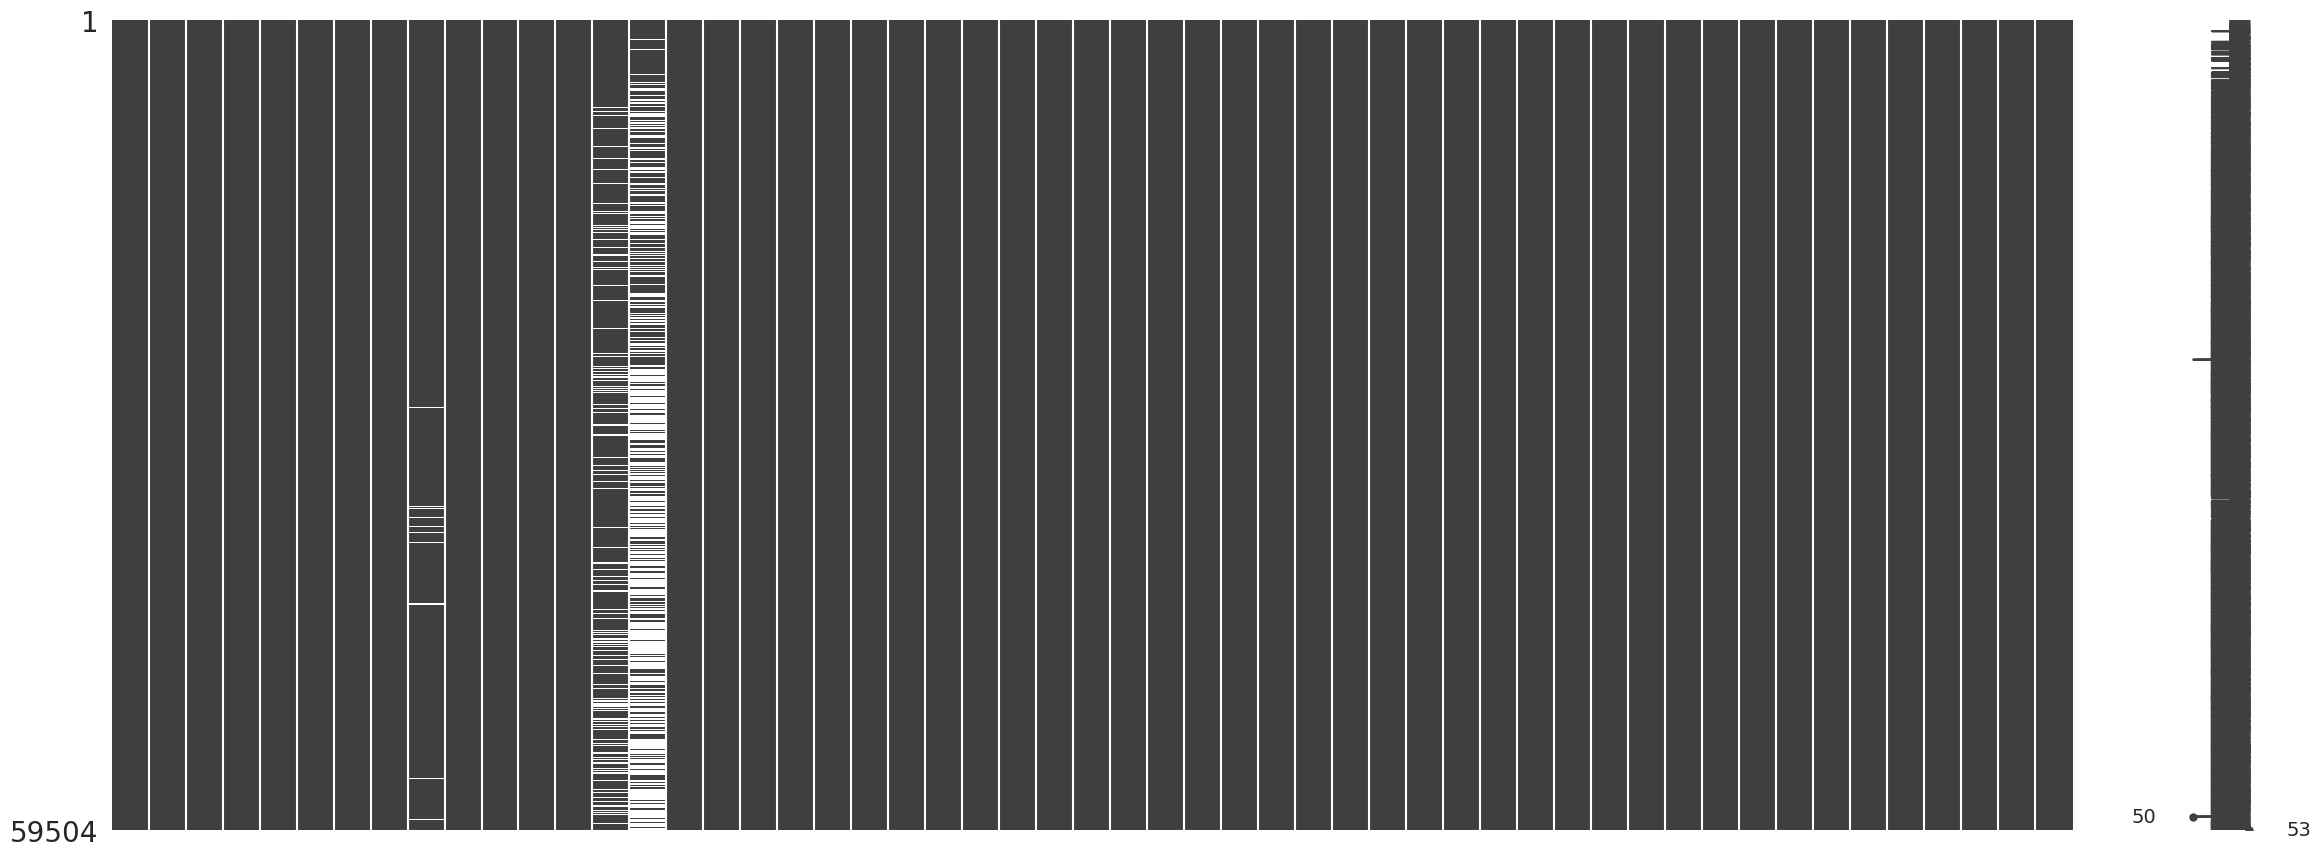

<Figure size 500x500 with 0 Axes>

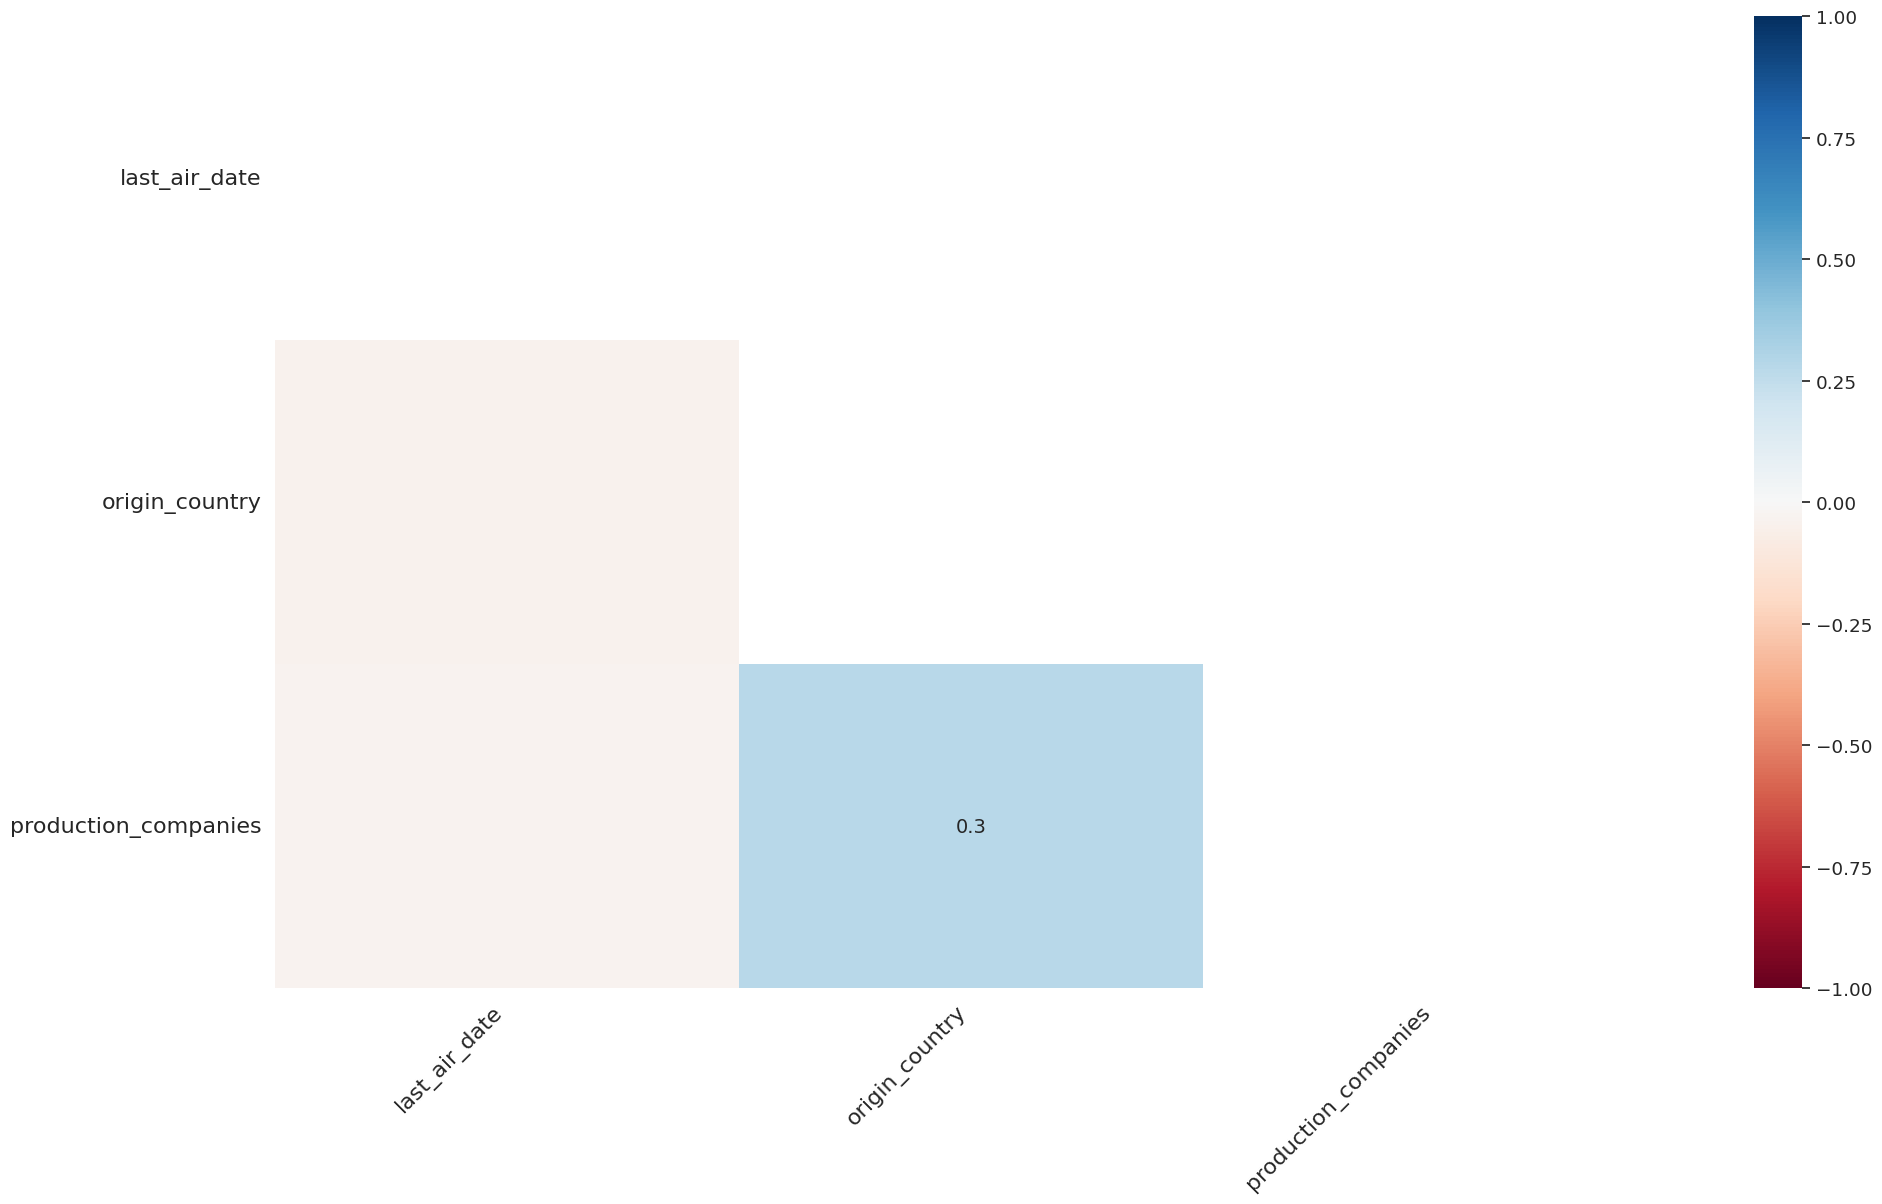

In [49]:
import missingno as msno  # Import missingno as msno

# Visualize the missing data matrix for the manipulated data
msno.matrix(manipulated_data)

# Visualize the missingness correlation heatmap
plt.figure(figsize=(5, 5))  # Adjust the figure size for heatmap
msno.heatmap(manipulated_data)
plt.show()


In [50]:
# Calculate the percentage of missing data for each column
missing_percent = df.isnull().mean() * 100

# Create a DataFrame to display the missing percentage for each column
missing_data_df = pd.DataFrame({
    'Missing Percentage': missing_percent
})

# Sort the DataFrame by missing percentage (optional)
missing_data_df = missing_data_df.sort_values(by='Missing Percentage', ascending=False)

# Display the results
print(missing_data_df)


                              Missing Percentage
production_companies               55.897083    
origin_country                     13.790670    
last_air_date                       1.198239    
name                                0.000000    
id                                  0.000000    
vote_count                          0.000000    
number_of_episodes                  0.000000    
number_of_seasons                   0.000000    
vote_average                        0.000000    
in_production                       0.000000    
popularity                          0.000000    
adult                               0.000000    
first_air_date                      0.000000    
status                              0.000000    
type                                0.000000    
episode_run_time                    0.000000    
languages_count                     0.000000    
en                                  0.000000    
zh                                  0.000000    
ja                  

#Handling Missing 'last_air_date' for Ongoing Shows Based on 'in_ production' Status


the code identifies rows with missing 'last_air_date' values and fills them based on the 'in_production' status. If a show is still in production ('in_production'=True), the 'last_air_date' is set to the current date. If not 'in production', the missing values are left unchanged. This approach ensures that the last_air_date column is appropriately populated while accounting for ongoing productions.

In [51]:
import pandas as pd
from datetime import datetime


manipulated_data['last_air_date'] = pd.to_datetime(manipulated_data['last_air_date'], errors='coerce')

# Debug: Check rows where 'last_air_date' is missing
print("Rows with missing 'last_air_date' in manipulated_data:")
print(manipulated_data[manipulated_data['last_air_date'].isnull()])

# Handle missing last_air_date based on in production in manipulated_data
manipulated_data['last_air_date'] = manipulated_data.apply(
    lambda row: datetime.today() if pd.isnull(row['last_air_date']) and row['in_production'] else row['last_air_date'],
    axis=1
)

# Debug: Check the updated DataFrame
print("\nUpdated manipulated_data:")
print(manipulated_data[['first_air_date', 'last_air_date', 'in_production']])

Rows with missing 'last_air_date' in manipulated_data:
         id                               name                              \
14457  229609  my daughter left the nest and returned an s-rank adventurer   
16860  234967                              even if i fall in love with you   
17453  238675                                                         近战法师   
17465  237627                                                       schnee   
17581  239664                                             nu' det jul igen   
...       ...                                                          ...   
59403  243202                                          rhythm + flow italy   
59433  236327                                                    twin love   
59456  236799                                            eén grote familie   
59460  236667                                     the inextricable destiny   
59501  240609                                                 born to be y   

       n

In [52]:
# Check the rows where 'last_air_date' is NaN in manipulated_data
nan_rows = manipulated_data[manipulated_data['last_air_date'].isnull()]

# See the distribution of 'in_production' for these rows
print("Distribution of 'in_production' for rows with NaN in 'last_air_date' in manipulated_data:")
print(nan_rows['in_production'].value_counts())



Distribution of 'in_production' for rows with NaN in 'last_air_date' in manipulated_data:
in_production
False    9
Name: count, dtype: int64


There are 11 rows where the 'in_production' column is False, indicating that these shows have finished airing or are not in production anymore, but their last_air_date values are missing.

In [53]:
!pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=d74d4055636adef036a9ce73eaf25cc2f98ae10a8ab62fc6703c2b6b3f4723ee
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=693779afc2ddf9cbf212978ff4b786b4a661f79ccae0fc72c4611081f2a53dbd
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [54]:
from fancyimpute import IterativeImputer
import pandas as pd

# Step 1: Convert 'last_air_date' to datetime (if not already in datetime format)
manipulated_data['last_air_date'] = pd.to_datetime(manipulated_data['last_air_date'], errors='coerce')

# Step 2: Convert 'last_air_date' to numeric (timestamp) to work with MICE
manipulated_data['last_air_date_numeric'] = manipulated_data['last_air_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Step 3: Apply MICE imputation to the numeric version of 'last_air_date'
mice_imputer = IterativeImputer()

# Fit and transform to fill missing 'last_air_date_numeric' values
manipulated_data['last_air_date_numeric'] = mice_imputer.fit_transform(
    manipulated_data[['last_air_date_numeric']]
)

# Step 4: Convert the numeric 'last_air_date_numeric' back to datetime
manipulated_data['last_air_date'] = pd.to_datetime(manipulated_data['last_air_date_numeric'], unit='s')

# Step 5: Drop the temporary 'last_air_date_numeric' column
manipulated_data.drop(columns=['last_air_date_numeric'], inplace=True)

# Check the result
print(manipulated_data[['first_air_date', 'last_air_date', 'in_production']].head())


  first_air_date last_air_date  in_production
0   2017-05-02     2021-12-03       False    
1   2017-01-26     2023-08-23       False    
2   2021-09-17     2021-09-17        True    
3   2017-09-25     2023-05-01        True    
4   2021-01-15     2021-03-05       False    


In [55]:
manipulated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59504 entries, 0 to 59503
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            59504 non-null  int64         
 1   name                          59504 non-null  object        
 2   number_of_seasons             59504 non-null  float64       
 3   number_of_episodes            59504 non-null  int64         
 4   vote_count                    59504 non-null  int64         
 5   vote_average                  59504 non-null  float64       
 6   adult                         59504 non-null  bool          
 7   first_air_date                59504 non-null  datetime64[ns]
 8   last_air_date                 59504 non-null  datetime64[ns]
 9   in_production                 59504 non-null  bool          
 10  popularity                    59504 non-null  float64       
 11  type                        

#Handling Missing Data in Categorical Columns

#Random Forest Imputation for Missing Values in Specific Categorical Columns ('origin_country', 'production_companies')

This code performs Random Forest imputation to handle missing values in the 'origin_country' and 'production_companies' columns of the manipulated_data DataFrame. The model is applied specifically to these two categorical columns, which still have missing values after previous attempts to impute data using KNN and MICE. The code is optimized to run only on these two columns to reduce computational load, as the full imputation process was too resource-intensive and caused issues.

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume manipulated_data is your DataFrame

# Specific columns you want to handle
cols_to_impute = ['origin_country', 'production_companies']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each of the specified columns to impute missing values using RandomForestClassifier
for col in cols_to_impute:
    missing = manipulated_data[col].isnull()  # Check for missing values in the column
    if missing.sum() > 0:  # If there are missing values
        print(f"Imputing missing values for {col}")

        # Encode the column using Label Encoding
        manipulated_data[col] = label_encoder.fit_transform(manipulated_data[col].astype(str))

        # Select only rows where the current column is not missing (for training)
        non_missing_data = manipulated_data[~missing]

        try:
            # Fit the Random Forest model on non-missing data (excluding the column to impute)
            rf = RandomForestClassifier(n_estimators=10, random_state=0)
            X_train = non_missing_data.drop(columns=cols_to_impute)  # Drop the column to impute
            y_train = non_missing_data[col]

            rf.fit(X_train, y_train)

            # Predict the missing values using the trained model
            X_test = manipulated_data[missing].drop(columns=cols_to_impute)
            predicted_values = rf.predict(X_test)

            # Assign the predicted values to the missing positions in the column
            manipulated_data.loc[missing, col] = predicted_values

            print(f"Imputation completed for {col}")
        except Exception as e:
            print(f"Error imputing {col}: {e}")

# After imputation, check for remaining missing data
missing_data_after_imputation = manipulated_data[cols_to_impute].isnull().sum()
print("Missing data after imputation for selected columns:")
print(missing_data_after_imputation)

# Display the DataFrame after imputation for the selected columns
print(manipulated_data[cols_to_impute].head())


Imputing missing values for origin_country
Error imputing origin_country: could not convert string to float: 'money heist'
Imputing missing values for production_companies
Error imputing production_companies: could not convert string to float: 'money heist'
Missing data after imputation for selected columns:
origin_country          0
production_companies    0
dtype: int64
   origin_country  production_companies
0        156               12353       
1        359               12645       
2        254               10181       
3        359                 368       
4        359                7100       


In [57]:
# Check if there is any missing data in the DataFrame
missing_data = manipulated_data.isnull().sum()

# Display the missing data for each column
print("Missing data in each column:")
print(missing_data)

Missing data in each column:
id                              0
name                            0
number_of_seasons               0
number_of_episodes              0
vote_count                      0
vote_average                    0
adult                           0
first_air_date                  0
last_air_date                   0
in_production                   0
popularity                      0
type                            0
status                          0
origin_country                  0
production_companies            0
episode_run_time                0
languages_count                 0
en                              0
zh                              0
ja                              0
fr                              0
ko                              0
de                              0
es                              0
nl                              0
pt                              0
hi                              0
networks_count                  0
netflix            

<Figure size 1200x600 with 0 Axes>

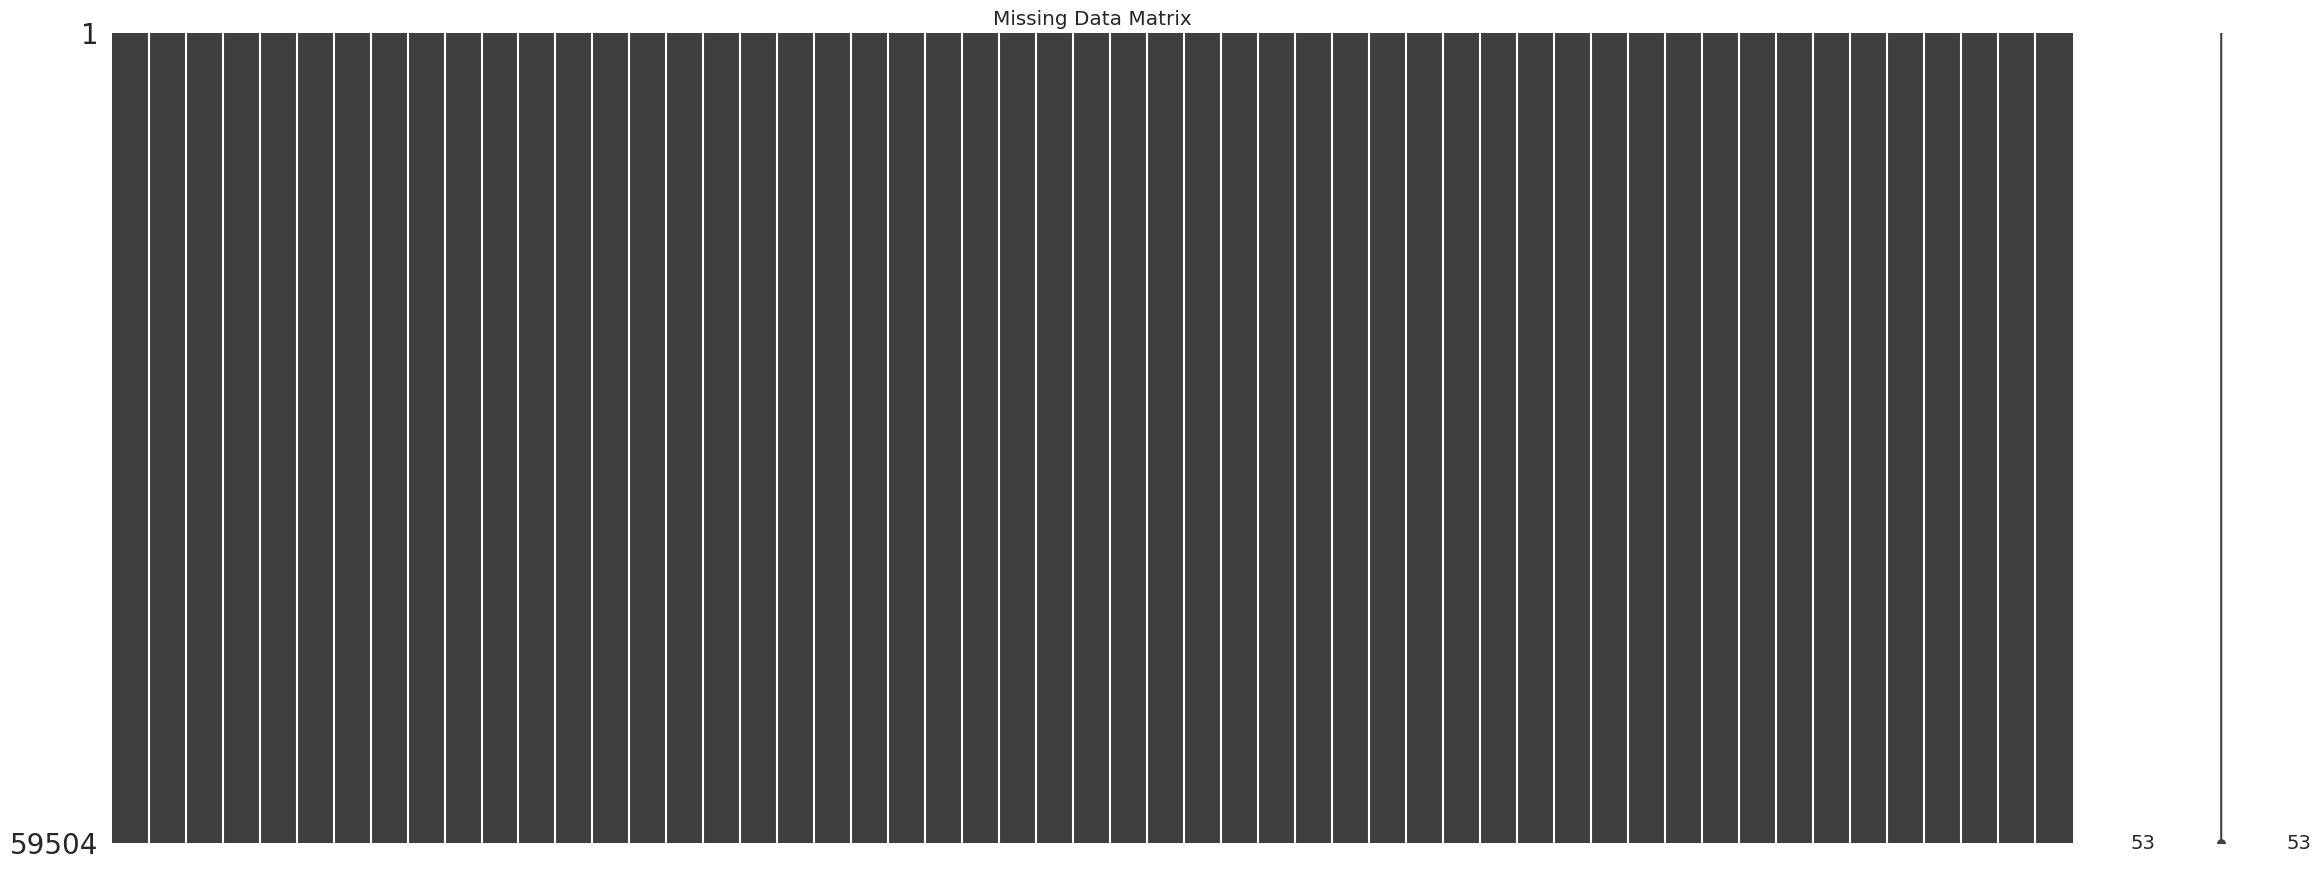

In [58]:
plt.figure(figsize=(12, 6))
msno.matrix(manipulated_data)  # Replace 'manipulated_data' with your actual DataFrame name
plt.title("Missing Data Matrix")
plt.show()


In [59]:
manipulated_data.to_pickle('EDA_df.pkl')